## Import necessary libraries

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Temperature Forecast Project using ML

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.


## Importing dataset

In [71]:
df = pd.read_csv('temperature.csv')

In [72]:
print('No. of rows ',df.shape[0])
print('No. of columns ',df.shape[1])

pd.set_option("display.max_columns",None)

df.head()

No. of rows  7752
No. of columns  25


station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  
0       21.2  
1       22.5  
2       23.9  
3       24.3  
4       22.5

The dataset contains the details of maximum and minimum air temperatures forecast in which both numerical and categorical data are present. Here the minimum temperature for the next day and the maximum temperature for the next day is the target variable so it will be ermed as "Regresson Problem".

In [73]:
# Checking the columns of the dataset
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [74]:
# Checking name , its counts and its dtype of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


It seems that all columns has float datatype only one columns has object that is date so, we change it datatype into datatime.

In [75]:
# Let check if any whitespace,'?' 'NA' or '-' exist in dataset.
df.isin([' ','NA','-','?']).sum().any()

False

No whitespace, NA, '-' exist in dataset.

In [76]:
# Let's Checking duplicate values
df.duplicated().sum()

0

We see that there are not any duplicate value present.

In [77]:
# Checking missing values 
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [78]:
# Checking missing data into percentage 
(df.shape[0] - df.notnull().sum())/df.shape[0]*100

station             0.025800
Date                0.025800
Present_Tmax        0.902993
Present_Tmin        0.902993
LDAPS_RHmin         0.967492
LDAPS_RHmax         0.967492
LDAPS_Tmax_lapse    0.967492
LDAPS_Tmin_lapse    0.967492
LDAPS_WS            0.967492
LDAPS_LH            0.967492
LDAPS_CC1           0.967492
LDAPS_CC2           0.967492
LDAPS_CC3           0.967492
LDAPS_CC4           0.967492
LDAPS_PPT1          0.967492
LDAPS_PPT2          0.967492
LDAPS_PPT3          0.967492
LDAPS_PPT4          0.967492
lat                 0.000000
lon                 0.000000
DEM                 0.000000
Slope               0.000000
Solar radiation     0.000000
Next_Tmax           0.348297
Next_Tmin           0.348297
dtype: float64

We seems that there are few values are missing. we can see that target columns has also missing value. So we can remove those columns.

In [79]:
df[df['station'].isnull()]

station Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
7750      NaN  NaN          20.0          11.3    19.794666    58.936283   
7751      NaN  NaN          37.6          29.9    98.524734   100.000153   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
7750         17.624954         14.272646   2.882580  -13.603212   0.000000   
7751         38.542255         29.619342  21.857621  213.414006   0.967277   

      LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
7750   0.000000   0.000000    0.00000    0.000000    0.000000    0.000000   
7751   0.968353   0.983789    0.97471   23.701544   21.621661   15.841235   

      LDAPS_PPT4      lat      lon      DEM     Slope  Solar radiation  \
7750    0.000000  37.4562  126.826   12.370  0.098475      4329.520508   
7751   16.655469  37.6450  127.135  212.335  5.178230      5992.895996   

      Next_Tmax  Next_Tmin  
7750       17.4       11.3  
7751       38.9       29.8

In [80]:
df.tail()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
7747   0.030034   0.081035   0.000000   0.000000    0.000000    0.000000   
7748   0.035874   0.074962   0.000000   0.000000    0.000000    0.000000   
7749   0.048954   0.059869   0.000000   0.000796    0.000000    0.000000   
7750   0.000000   0.000000   0.000000   0.000000    0.000000    0.000000   
7751   0.967277   0.968353   0.983789   0.974710   23.701544   21.621661   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM     Slope  \
7747    0.000000    0.000000  37.5372  126.891   15.5876  0.155400   
7748    0.000000    0.000000  37.5237  126.909   17.2956  0.222300   
7749    0.000000    0.000000  37.5237  126.970   19.5844  0.271300   
7750    0.000000    0.000000  37.4562  126.826   12.3700  0.098475   
7751   15.841235   16.655469  37.6450  127.135  212.3350  5.178230   

      Solar radiation  Next_Tmax  Next_Tmin  
7747      4443.313965       28.3       18.1  
7748      4438.373535       28.6       18.8  
7749      4451.345215       27.8       17.4  
7750      4329.520508       17.4       11.3  
7751      5992.895996       38.9       29.8

We can see that only in station and Date columns has only 2 misisng value together same index we can also check the these value are missing in the last two index. The used weather station number: 1 to 25 
and we can also see the 7749 rows and 25.0 station and after mising two values. So we can remove it.

In [81]:
df.shape[0]

7752

In [82]:
# We can remove those rows which have misisng values
df = df.dropna(axis=0)

df.shape[0]

7588

In [83]:
print('We drop only {0} Rows'.format(7752-7588))

We drop only 164 Rows


In [84]:
# Converting the datatype of Date Column from object to datetime
df["Date"] = pd.to_datetime(df.Date, format = '%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7588 non-null   float64       
 1   Date              7588 non-null   datetime64[ns]
 2   Present_Tmax      7588 non-null   float64       
 3   Present_Tmin      7588 non-null   float64       
 4   LDAPS_RHmin       7588 non-null   float64       
 5   LDAPS_RHmax       7588 non-null   float64       
 6   LDAPS_Tmax_lapse  7588 non-null   float64       
 7   LDAPS_Tmin_lapse  7588 non-null   float64       
 8   LDAPS_WS          7588 non-null   float64       
 9   LDAPS_LH          7588 non-null   float64       
 10  LDAPS_CC1         7588 non-null   float64       
 11  LDAPS_CC2         7588 non-null   float64       
 12  LDAPS_CC3         7588 non-null   float64       
 13  LDAPS_CC4         7588 non-null   float64       
 14  LDAPS_PPT1        7588 non-nu

In [85]:
# Setting Date as Dataframe Index
df.set_index('Date',inplace=True)

The set_index() function is used to set the DataFrame index using existing columns.

In [86]:
df.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688    91.116364   
2013-06-30      2.0          31.9          21.6    52.263397    90.604721   
2013-06-30      3.0          31.6          23.3    48.690479    83.973587   
2013-06-30      4.0          32.0          23.4    58.239788    96.483688   
2013-06-30      5.0          31.4          21.9    56.174095    90.155128   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
Date                                                                   
2013-06-30         28.074101         23.006936  6.818887   69.451805   
2013-06-30         29.850689         24.035009  5.691890   51.937448   
2013-06-30         30.091292         24.565633  6.138224   20.573050   
2013-06-30         29.704629         23.326177  5.650050   65.727144   
2013-06-30         29.113934         23.486480  5.735004  107.965535   

            LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  \
Date                                                                 
2013-06-30   0.233947   0.203896   0.161697   0.130928         0.0   
2013-06-30   0.225508   0.251771   0.159444   0.127727         0.0   
2013-06-30   0.209344   0.257469   0.204091   0.142125         0.0   
2013-06-30   0.216372   0.226002   0.161157   0.134249         0.0   
2013-06-30   0.151407   0.249995   0.178892   0.170021         0.0   

            LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
Date                                                                         
2013-06-30         0.0         0.0         0.0  37.6046  126.991  212.3350   
2013-06-30         0.0         0.0         0.0  37.6046  127.032   44.7624   
2013-06-30         0.0         0.0         0.0  37.5776  127.058   33.3068   
2013-06-30         0.0         0.0         0.0  37.6450  127.022   45.7160   
2013-06-30         0.0         0.0         0.0  37.5507  127.135   35.0380   

             Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                       
2013-06-30  2.7850      5992.895996       29.1       21.2  
2013-06-30  0.5141      5869.312500       30.5       22.5  
2013-06-30  0.2661      5863.555664       31.1       23.9  
2013-06-30  2.5348      5856.964844       31.7       24.3  
2013-06-30  0.5055      5859.552246       31.2       22.5

In [87]:
# Checking the value counts of each columns
for i in df.columns:
    print(df[i].value_counts())
    print('*'*100)

station
25.0    307
10.0    307
23.0    307
18.0    307
17.0    307
2.0     307
3.0     306
4.0     306
13.0    305
16.0    304
20.0    304
21.0    304
14.0    303
1.0     303
9.0     302
12.0    302
15.0    302
19.0    302
22.0    302
24.0    302
11.0    301
7.0     301
6.0     301
8.0     300
5.0     296
Name: count, dtype: int64
****************************************************************************************************
Present_Tmax
31.4    112
29.4    108
29.1    106
29.2    105
30.6    105
       ... 
21.2      1
20.1      1
36.4      1
20.3      1
20.0      1
Name: count, Length: 167, dtype: int64
****************************************************************************************************
Present_Tmin
24.0    160
23.8    153
23.5    143
23.1    143
23.3    140
       ... 
14.3      1
29.9      1
29.7      1
29.1      1
15.0      1
Name: count, Length: 155, dtype: int64
************************************************************************************************

In [88]:
# Checking the unique values of each columns
df.nunique().to_frame('No. of unique values')

No. of unique values
station                             25
Present_Tmax                       167
Present_Tmin                       155
LDAPS_RHmin                       7585
LDAPS_RHmax                       7577
LDAPS_Tmax_lapse                  7588
LDAPS_Tmin_lapse                  7588
LDAPS_WS                          7588
LDAPS_LH                          7588
LDAPS_CC1                         7485
LDAPS_CC2                         7496
LDAPS_CC3                         7512
LDAPS_CC4                         7438
LDAPS_PPT1                        2779
LDAPS_PPT2                        2479
LDAPS_PPT3                        2326
LDAPS_PPT4                        1892
lat                                 12
lon                                 25
DEM                                 25
Slope                               25
Solar radiation                   1575
Next_Tmax                          181
Next_Tmin                          157

## Description of Dataset

In [89]:
# Statistical summary of numerical columns
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7588.000000   7588.000000   7588.000000  7588.000000  7588.000000   
mean     13.014101     29.748366     23.195809    56.724969    88.360823   
std       7.217858      2.967401      2.400880    14.626559     7.199456   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.600000    45.960243    84.203724   
50%      13.000000     29.900000     23.400000    55.023199    89.784122   
75%      19.000000     32.000000     24.800000    67.115099    93.742725   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7588.000000       7588.000000  7588.000000  7588.000000   
mean          29.620128         23.511786     7.094097    62.492606   
std            2.943496          2.342579     2.177034    33.686158   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673756         22.086820     5.675358    37.206201   
50%           29.709537         23.758249     6.547838    56.898324   
75%           31.711109         25.155660     8.028960    84.235666   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1    LDAPS_CC2    LDAPS_CC3    LDAPS_CC4   LDAPS_PPT1  \
count  7588.000000  7588.000000  7588.000000  7588.000000  7588.000000   
mean      0.368510     0.355528     0.317546     0.298268     0.589008   
std       0.262260     0.257922     0.249833     0.253392     1.927577   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.146546     0.140324     0.100950     0.081495     0.000000   
50%       0.315706     0.311676     0.261795     0.227459     0.000000   
75%       0.574174     0.557164     0.496444     0.498127     0.052594   
max       0.967277     0.968353     0.983789     0.974710    23.701544   

        LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat         lon  \
count  7588.000000  7588.000000  7588.000000  7588.000000  7588.00000   
mean      0.480738     0.275007     0.265373    37.544792   126.99142   
std       1.743327     1.146087     1.179661     0.050428     0.07922   
min       0.000000     0.000000     0.000000    37.456200   126.82600   
25%       0.000000     0.000000     0.000000    37.510200   126.93700   
50%       0.000000     0.000000     0.000000    37.550700   126.99500   
75%       0.017735     0.007855     0.000017    37.577600   127.04200   
max      21.621661    15.841235    16.655469    37.645000   127.13500   

               DEM        Slope  Solar radiation    Next_Tmax    Next_Tmin  
count  7588.000000  7588.000000      7588.000000  7588.000000  7588.000000  
mean     61.918136     1.259755      5343.724208    30.241526    22.910820  
std      54.323529     1.372748       429.782561     3.111807     2.482256  
min      12.370000     0.098500      4329.520508    17.400000    11.300000  
25%      28.700000     0.271300      5001.485717    28.200000    21.300000  
50%      45.716000     0.618000      5441.987305    30.400000    23.100000  
75%      59.832400     1.767800      5729.485840    32.600000    24.600000  
max     212.335000     5.178200      5992.895996    38.900000    29.800000

From the above description we can observe the following :-
    
   1. The counts of all the columns are same which means there are no missing values in the dataset.
   2. The mean values is alsomt same  the median (50%) in all columns but in LDAPS_LH columns means value is greater than median and LDAPS_PPT2 LDAPS_PPT3 LDAPS_PPT4 has 0 value in median.
   3. By summarizing the data we can observe there is a huge differences between 75% and max hence there are outliers present in the data.
   4. We can also notice some columns has Standard diviation to high.

## Data Visualization

### Univariate Analysis

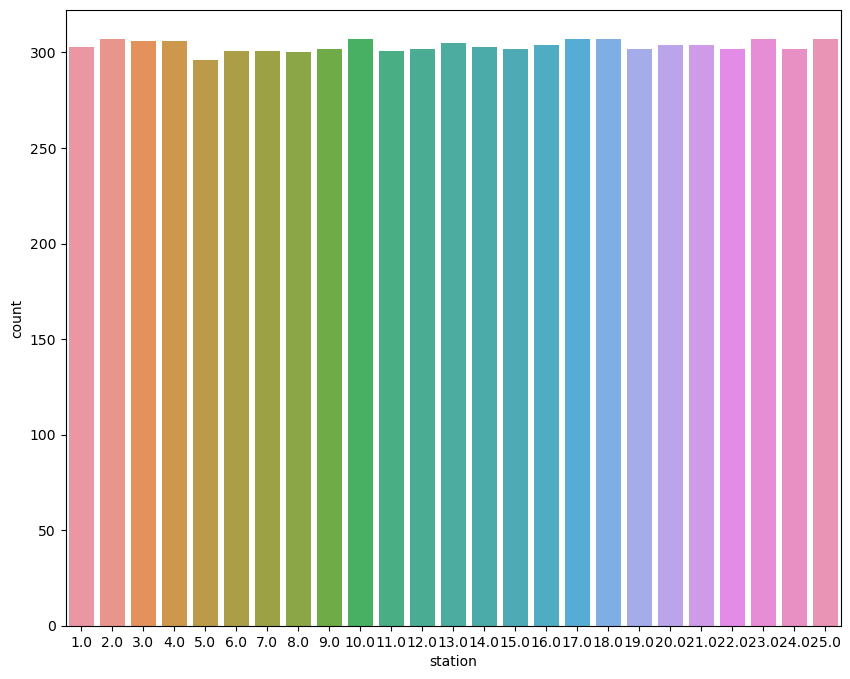

In [90]:
plt.figure(figsize=(10,8))
sns.countplot(x='station',data=df)
plt.show()

We can observe that all the same.

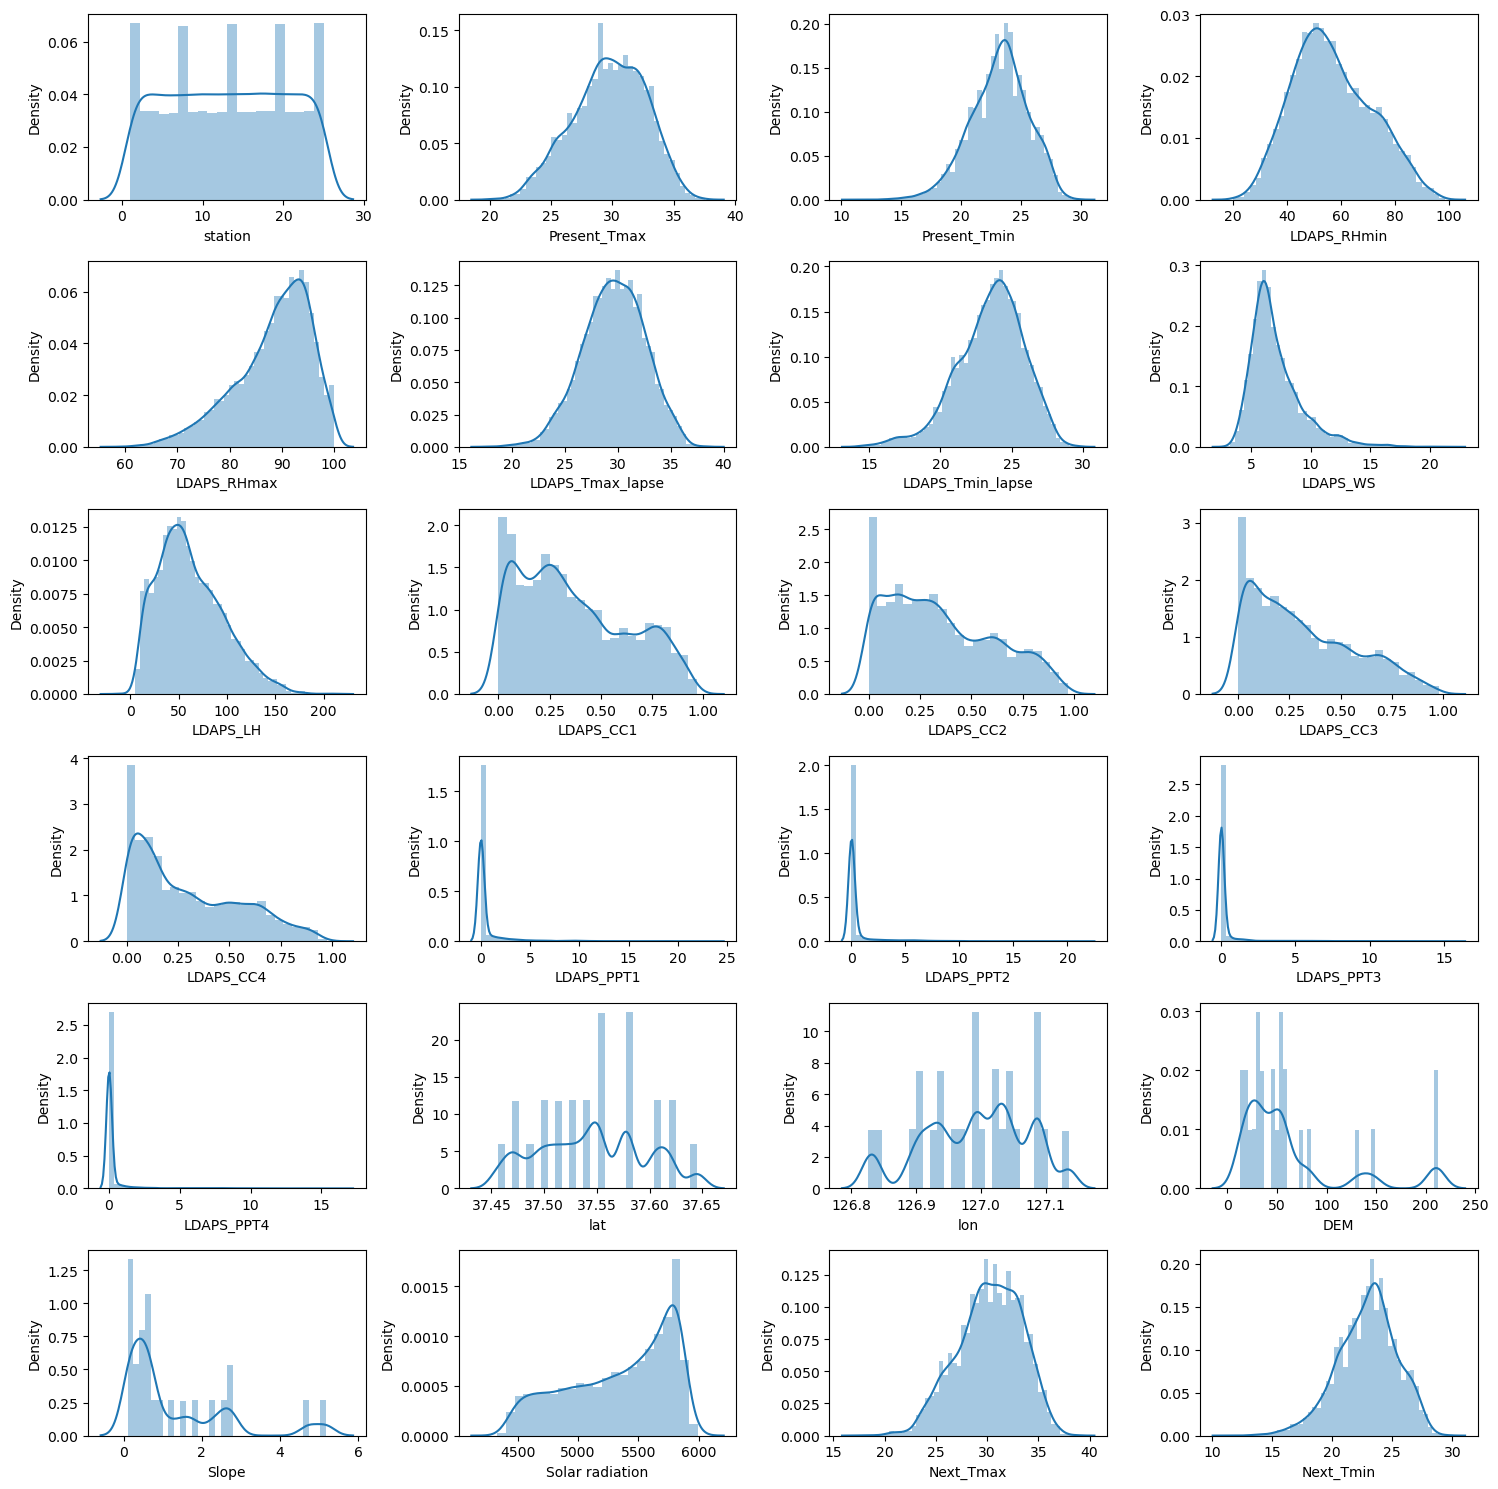

In [91]:
# Let's check how the data has been distirbuted in numerical columns
plt.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for col in df:
    if plotnumber<=24:
        plt.subplot(6,4,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col)
    plotnumber+=1
plt.tight_layout()

From the above distribution plots wecan notice that all data not normal. we seem that some are right skewned and some are left skewned.

### Bivariate Analysis

### Next_Tmax target columns vs all features

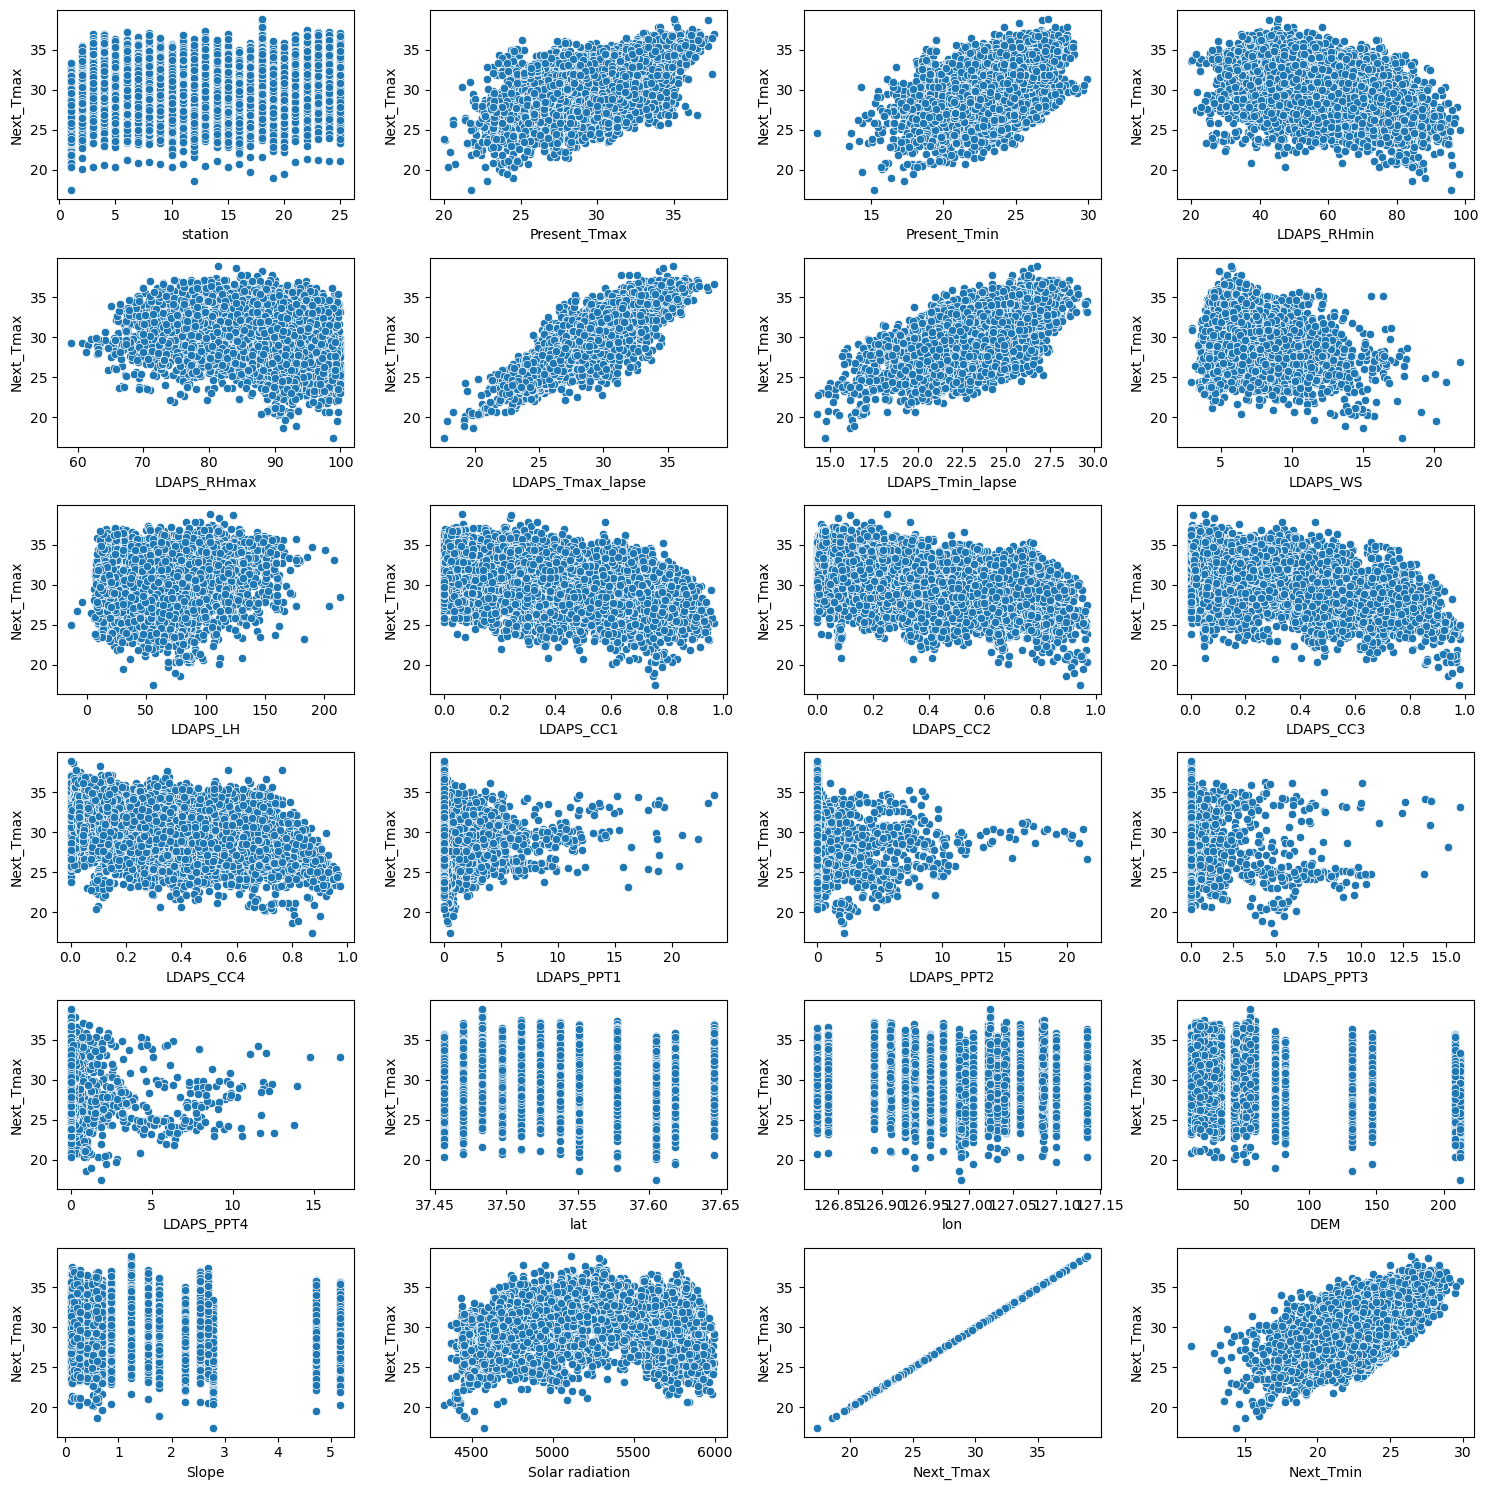

In [92]:
# Checking the relationship between all features vs Next_Tmax target columns
plt.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for col in df:
    if plotnumber<=24:
        plt.subplot(6,4,plotnumber)
        sns.scatterplot(x = col, y='Next_Tmax',data=df)
        plt.xlabel(col)
    plotnumber+=1
plt.tight_layout()

We can observe that some columns has strong linear relationship but some has week linear relationship with our first target.

### Next_Tmin target columns vs all features

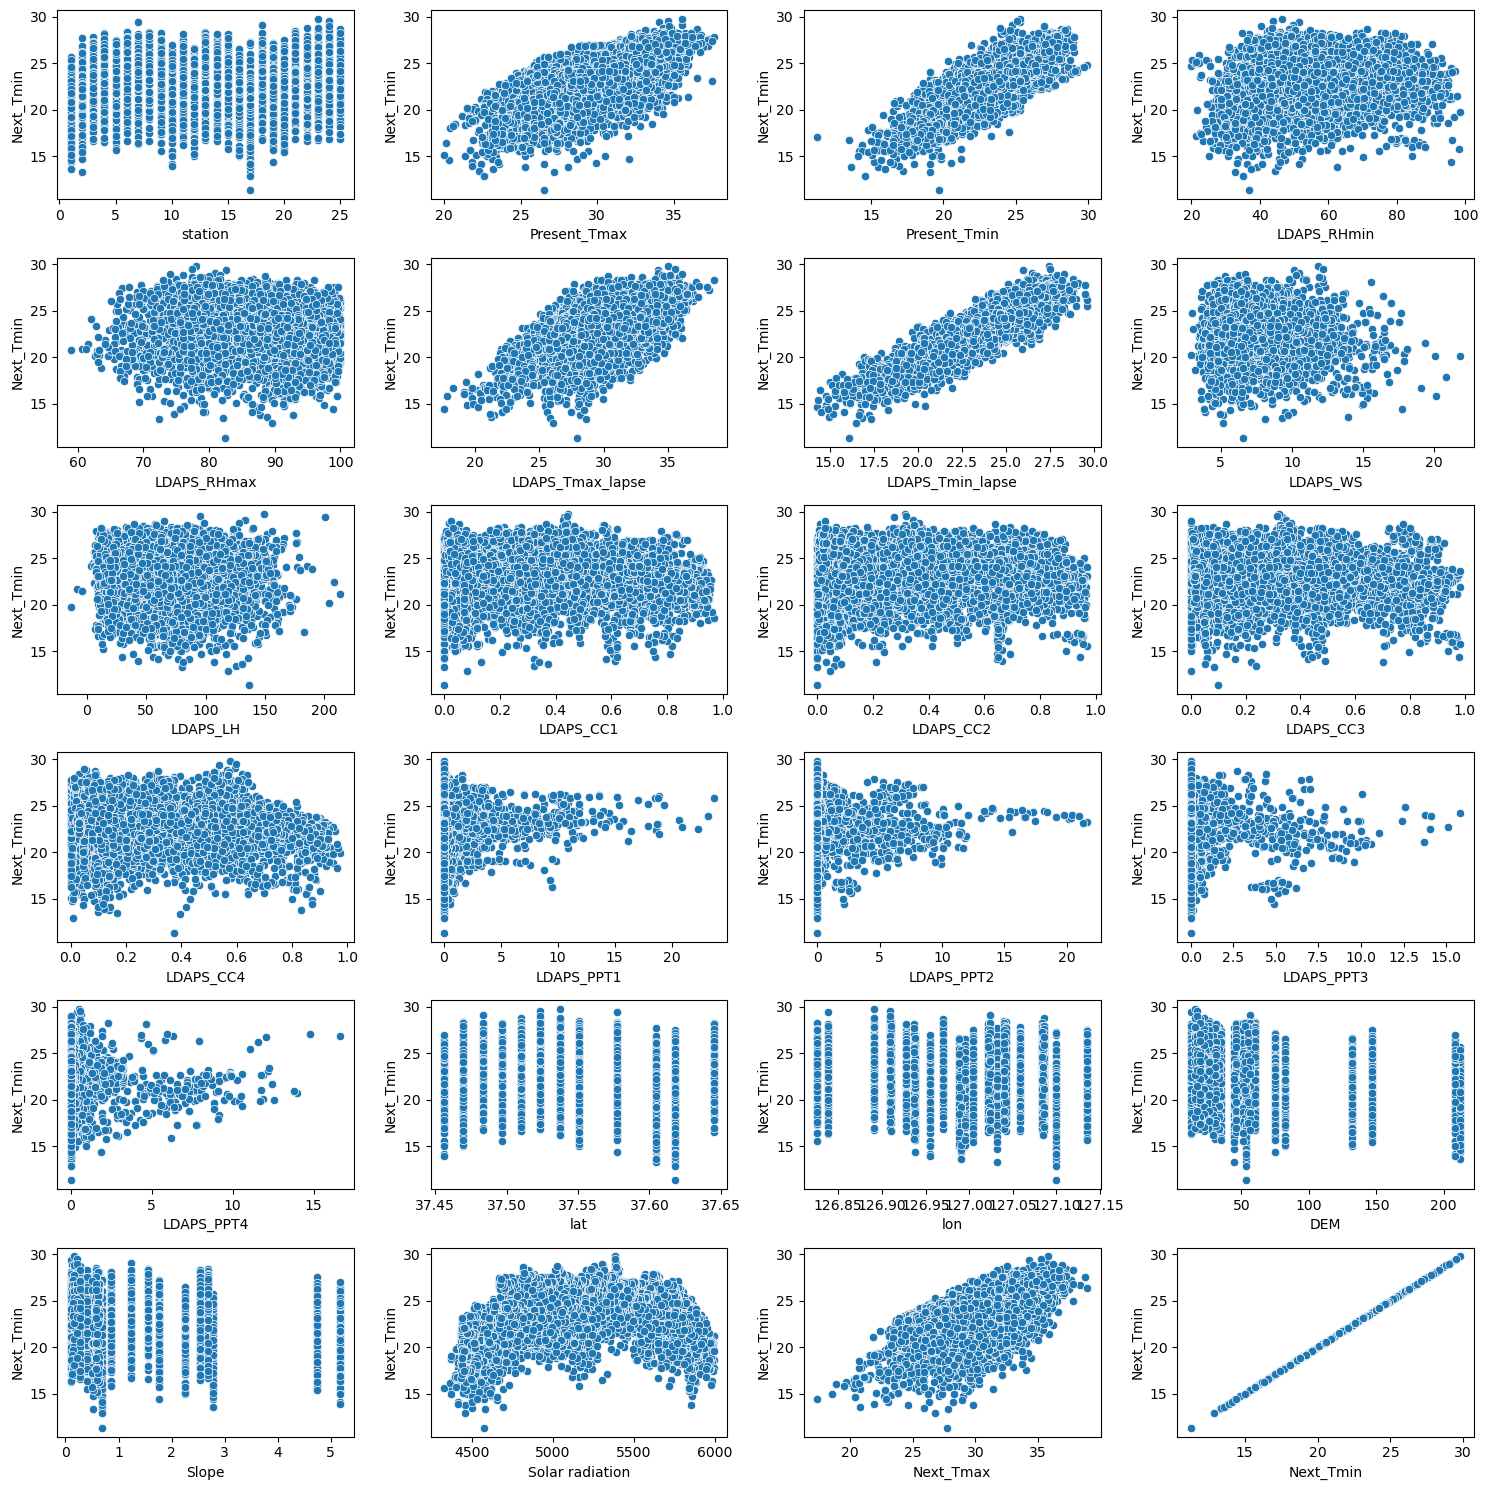

In [93]:
# Checking the relationship between all features vs Next_Tmin target columns
plt.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for col in df:
    if plotnumber<=24:
        plt.subplot(6,4,plotnumber)
        sns.scatterplot(x = col, y='Next_Tmin',data=df)
        plt.xlabel(col)
    plotnumber+=1
plt.tight_layout()

We can observe that some columns has strong linear relationship but some has week linear second with our first target.

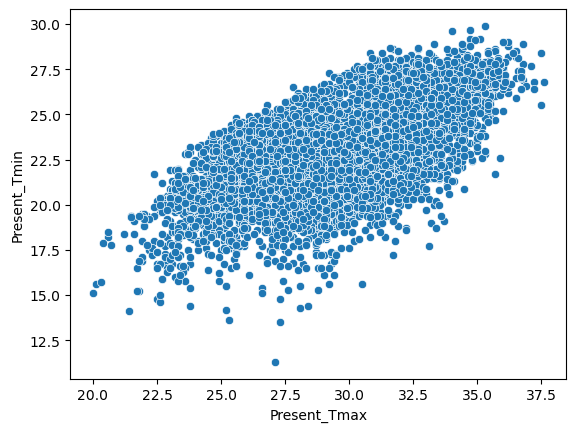

In [94]:
# Comparing Present_Tmax vs Present_Tmin
sns.scatterplot(x='Present_Tmax',y='Present_Tmin',data=df)
plt.show()

Here we can see the strong linear relation between the features.

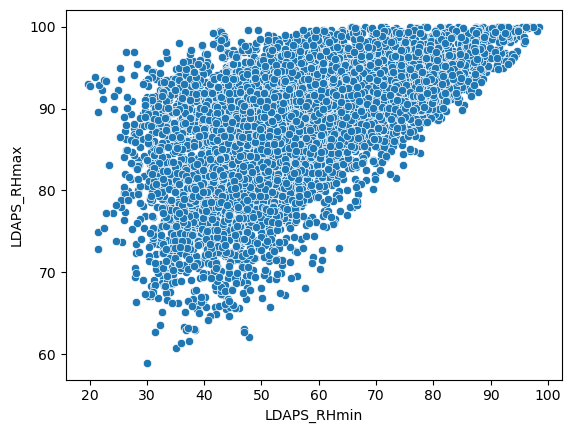

In [95]:
# Comparing LDAPS_RHmin vs LDAPS_RHmax
sns.scatterplot(x='LDAPS_RHmin',y='LDAPS_RHmax',data=df)
plt.show()

Here we can see the strong linear relation between the features.

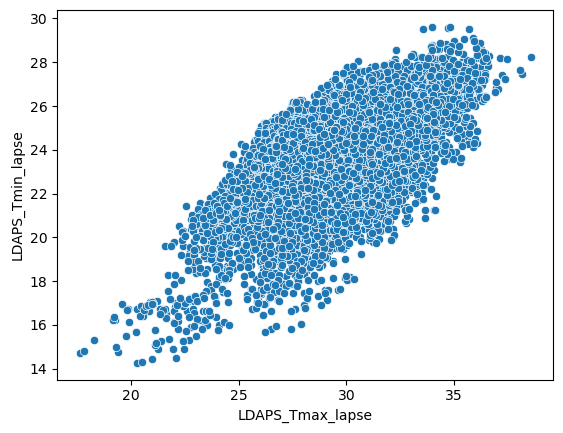

In [96]:
# Comparing LDAPS_Tmax_lapse vs LDAPS_Tmin_lapse
sns.scatterplot(x='LDAPS_Tmax_lapse',y='LDAPS_Tmin_lapse',data=df)
plt.show()

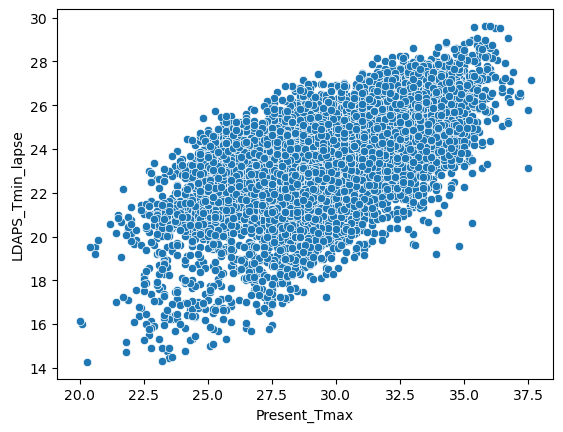

In [97]:
# Comparing LDAPS_Tmax_lapse vs LDAPS_Tmin_lapse
sns.scatterplot(x='Present_Tmax',y='LDAPS_Tmin_lapse',data=df)
plt.show()

### Multivariate Analysis

In [98]:
# Target columns is Next_Tmax
#sns.pairplot(df,hue='Next_Tmax')
plt.show()

In [99]:
# Target columns is Next_Tmin
#sns.pairplot(df,hue='Next_Tmin')
plt.show()

## Identify Outliers 

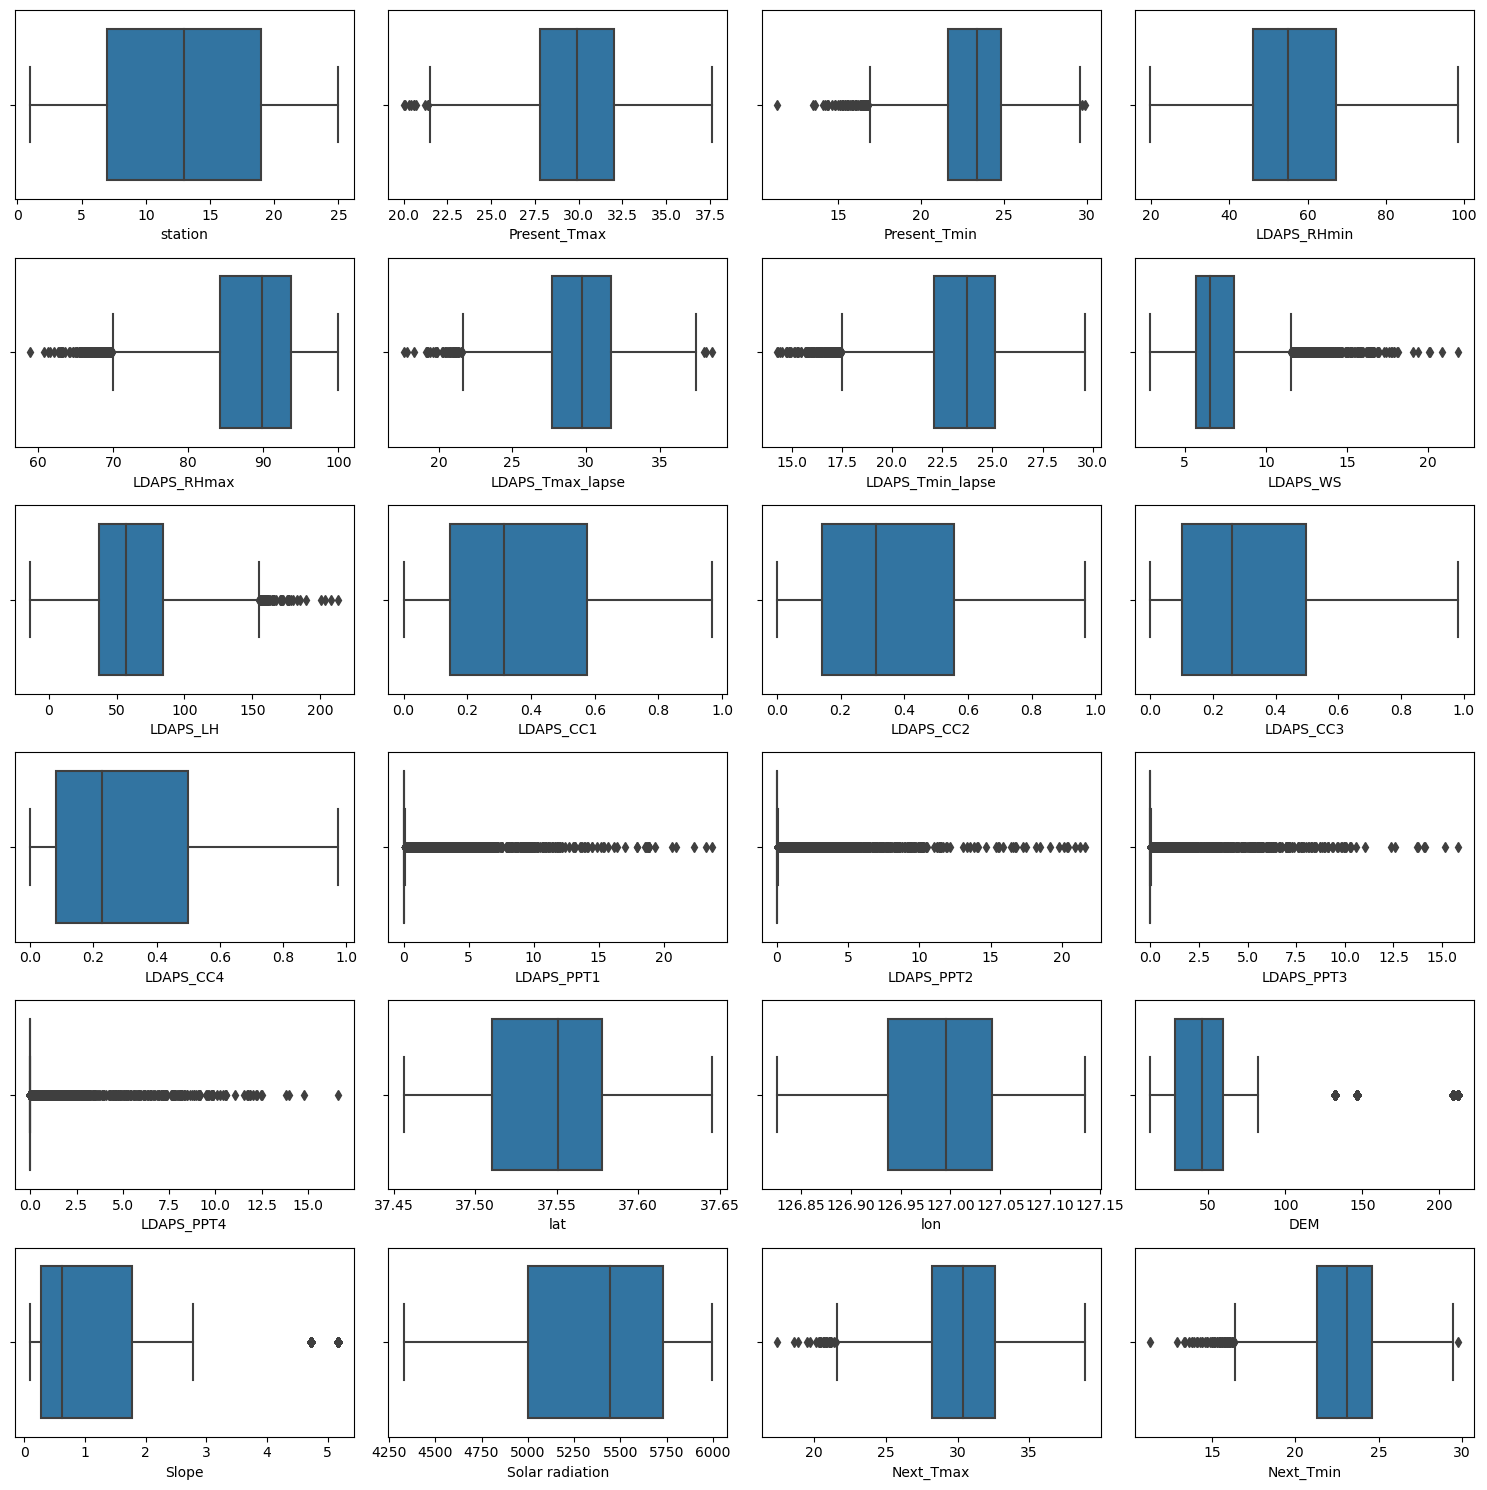

In [100]:
# Let's check the outliers by ploting boxplot
plt.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for col in df:
    if plotnumber<=24:
        plt.subplot(6,4,plotnumber)
        sns.boxplot(x = col,data=df)
        plt.xlabel(col)
    plotnumber+=1
plt.tight_layout()

Almost all the columns has outliers so we need to remove outliers.

## Outliers Detection and removel

### Checking outliers using zscore method

In [101]:
# Finding the outliers using zscore mehtod (formula = x - mean/std)
from scipy.stats import zscore

df_feature = df[['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS',
 'LDAPS_LH','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4',
 'DEM', 'Slope']]

z = np.abs(zscore(df_feature))            # Apply the formula and get the scaled data

df1 = df[(z<3).all(axis=1)]

# Shape of old and New Dataframe
print("Old Data Frame - ",df.shape[0])
print("New Data Frame - ",df1.shape[0])

print("\nData Loss Percentage After removing outliers with zscore method -\n ", ((df.shape[0] - df1.shape[0])/df.shape[0])*100)

Old Data Frame -  7588
New Data Frame -  6752

Data Loss Percentage After removing outliers with zscore method -
  11.017395888244597


It is affordable loss of data now we will check with IQR method

### Checking the outliers by using IQR metohd

In [102]:
# 1st quantile 
Q1 = df_feature.quantile(0.25)

# 3rd quantile
Q3 = df_feature.quantile(0.75)

#
IQR = Q3 - Q1

df2 = df[~((df_feature<(Q1 - 1.5 * IQR)) | (df_feature>(Q3 + 1.5 * IQR))).any(axis=1)]

# Shape of old and New Dataframe
print("Old Data Frame - ",df.shape[0])
print("New Data Frame - ",df2.shape[0])

print("\nData Loss Percentage After removing outliers with zscore method -\n ", ((df.shape[0] - df2.shape[0])/df.shape[0])*100)

Old Data Frame -  7588
New Data Frame -  3171

Data Loss Percentage After removing outliers with zscore method -
  58.210332103321036


In [103]:
# reassigning the changed dataframe name to our original dataframe name
df = df1

df.shape

(6752, 24)

We use zscore method because its Loss less data then IQR method

#### Checking how the data has been distributed of numerical columns

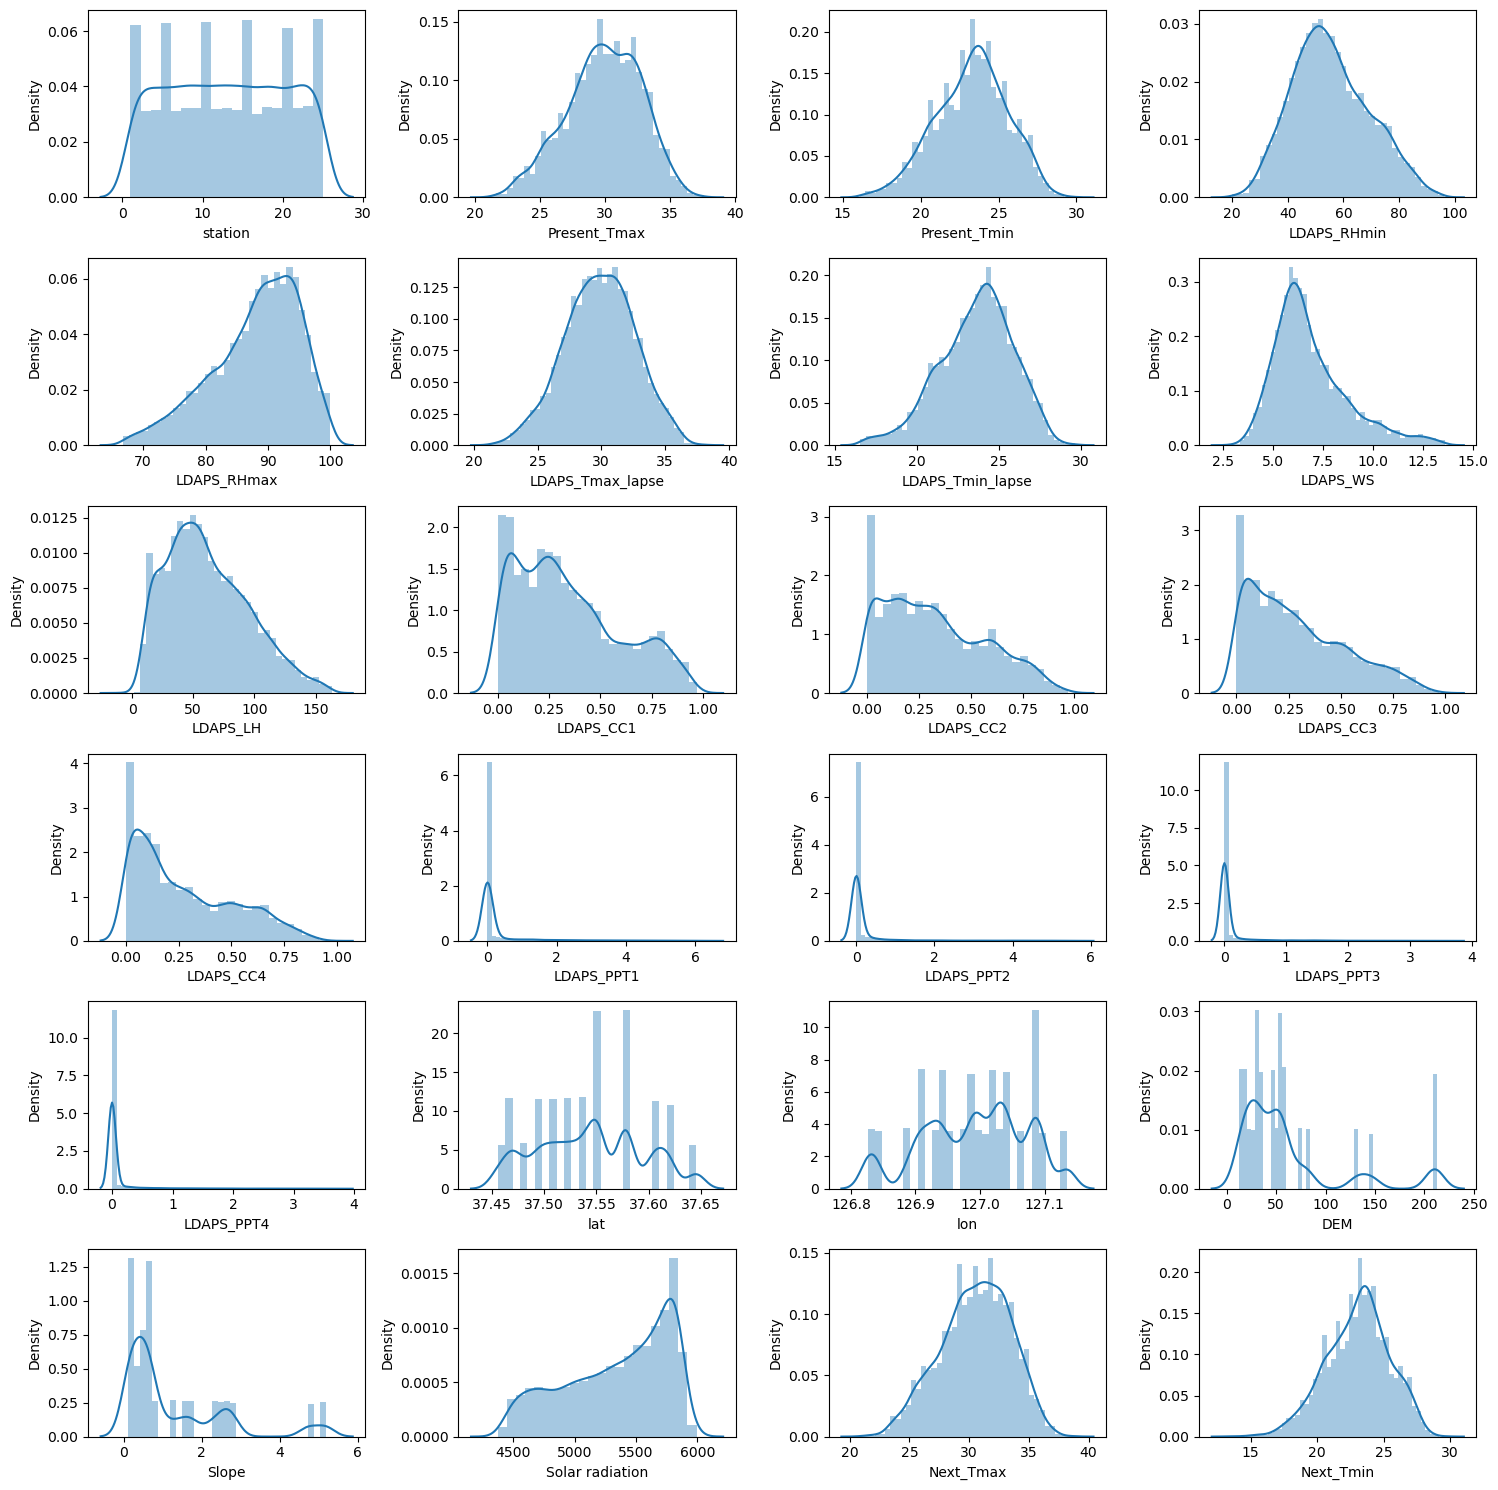

In [104]:
# Let's check how the data has been distirbuted in numerical columns
plt.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for col in df:
    if plotnumber<=24:
        plt.subplot(6,4,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col)
    plotnumber+=1
plt.tight_layout()

The columns has skewness in te data. So we can remove skewness.

### Checking the skewness

In [105]:
df.skew()

station            -0.002155
Present_Tmax       -0.272176
Present_Tmin       -0.228280
LDAPS_RHmin         0.310510
LDAPS_RHmax        -0.683451
LDAPS_Tmax_lapse   -0.108972
LDAPS_Tmin_lapse   -0.393491
LDAPS_WS            1.083709
LDAPS_LH            0.563986
LDAPS_CC1           0.594870
LDAPS_CC2           0.506390
LDAPS_CC3           0.703080
LDAPS_CC4           0.709748
LDAPS_PPT1          3.728629
LDAPS_PPT2          4.860127
LDAPS_PPT3          5.518685
LDAPS_PPT4          5.929500
lat                 0.104976
lon                -0.278235
DEM                 1.762057
Slope               1.588860
Solar radiation    -0.518382
Next_Tmax          -0.267742
Next_Tmin          -0.290919
dtype: float64

Here some are positively skewed while others are negatively skewed. We gone use yeo-johnson method for transfromation.

### Removing skewness using yeo-johnson method

In [106]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4',
      'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[skew] = scaler.fit_transform(df[skew].values)

### Checking  after remove skewness

In [107]:
df.skew()

station            -0.002155
Present_Tmax       -0.272176
Present_Tmin       -0.228280
LDAPS_RHmin         0.310510
LDAPS_RHmax        -0.103289
LDAPS_Tmax_lapse   -0.108972
LDAPS_Tmin_lapse   -0.028264
LDAPS_WS            0.007755
LDAPS_LH           -0.031350
LDAPS_CC1           0.594870
LDAPS_CC2           0.506390
LDAPS_CC3           0.094782
LDAPS_CC4           0.142444
LDAPS_PPT1          1.617994
LDAPS_PPT2          1.822642
LDAPS_PPT3          1.996578
LDAPS_PPT4          2.268742
lat                 0.104976
lon                -0.278235
DEM                 0.038745
Slope               0.233603
Solar radiation    -0.172197
Next_Tmax          -0.267742
Next_Tmin          -0.290919
dtype: float64

For LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3 and LDAPS_PPT4 skewness has not been removed but first we check other method.

In [108]:
# Checking skewness using sqrt method how much skewness remove
df1 = df.copy()

df1['LDAPS_PPT1'] = np.sqrt(df1['LDAPS_PPT1'])
df1['LDAPS_PPT2'] = np.sqrt(df1['LDAPS_PPT2'])
df1['LDAPS_PPT3'] = np.sqrt(df1['LDAPS_PPT3'])
df1['LDAPS_PPT4'] = np.sqrt(df1['LDAPS_PPT4'])

print('The skewness of LDAPS_PPT1 :',df1['LDAPS_PPT1'].skew())
print('The skewness of LDAPS_PPT2 :',df1['LDAPS_PPT2'].skew())
print('The skewness of LDAPS_PPT3 :',df1['LDAPS_PPT3'].skew())
print('The skewness of LDAPS_PPT4 :',df1['LDAPS_PPT4'].skew())

The skewness of LDAPS_PPT1 : -1.422462963833188
The skewness of LDAPS_PPT2 : -1.381450649426468
The skewness of LDAPS_PPT3 : -1.0836631452903955
The skewness of LDAPS_PPT4 : -1.1643553303093355


In [109]:
# Checking skewness using sqrt method how much skewness remove
df2 = df.copy()

df2['LDAPS_PPT1'] = np.cbrt(df2['LDAPS_PPT1'])
df2['LDAPS_PPT2'] = np.cbrt(df2['LDAPS_PPT2'])
df2['LDAPS_PPT3'] = np.cbrt(df2['LDAPS_PPT3'])
df2['LDAPS_PPT4'] = np.cbrt(df2['LDAPS_PPT4'])

print('The skewness of LDAPS_PPT1 :',df2['LDAPS_PPT1'].skew())
print('The skewness of LDAPS_PPT2 :',df2['LDAPS_PPT2'].skew())
print('The skewness of LDAPS_PPT3 :',df2['LDAPS_PPT3'].skew())
print('The skewness of LDAPS_PPT4 :',df2['LDAPS_PPT4'].skew())

The skewness of LDAPS_PPT1 : 1.366848879186585
The skewness of LDAPS_PPT2 : 1.5403118898167871
The skewness of LDAPS_PPT3 : 1.6314563838379426
The skewness of LDAPS_PPT4 : 1.8931307730229825


In [110]:
# Checking skewness using sqrt method  how much skewness remove
df3 = df.copy()

from scipy.stats import boxcox
df3['LDAPS_PPT1'] = boxcox(df3['LDAPS_PPT1'],0.1)
df3['LDAPS_PPT2'] = boxcox(df3['LDAPS_PPT2'],0.1)
df3['LDAPS_PPT3'] = boxcox(df3['LDAPS_PPT3'],0.1)
df3['LDAPS_PPT4'] = boxcox(df3['LDAPS_PPT4'],0.1)

print('The skewness of LDAPS_PPT1 :',df3['LDAPS_PPT1'].skew())
print('The skewness of LDAPS_PPT2 :',df3['LDAPS_PPT2'].skew())
print('The skewness of LDAPS_PPT3 :',df3['LDAPS_PPT3'].skew())
print('The skewness of LDAPS_PPT4 :',df3['LDAPS_PPT4'].skew())

The skewness of LDAPS_PPT1 : -2.1815634599874976
The skewness of LDAPS_PPT2 : -2.0935538895893107
The skewness of LDAPS_PPT3 : -1.809255998808137
The skewness of LDAPS_PPT4 : -2.1249166766965395


We checking all the method for For LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3 and LDAPS_PPT4 skewness has not been removed So we go back and use yeo-johnson method.

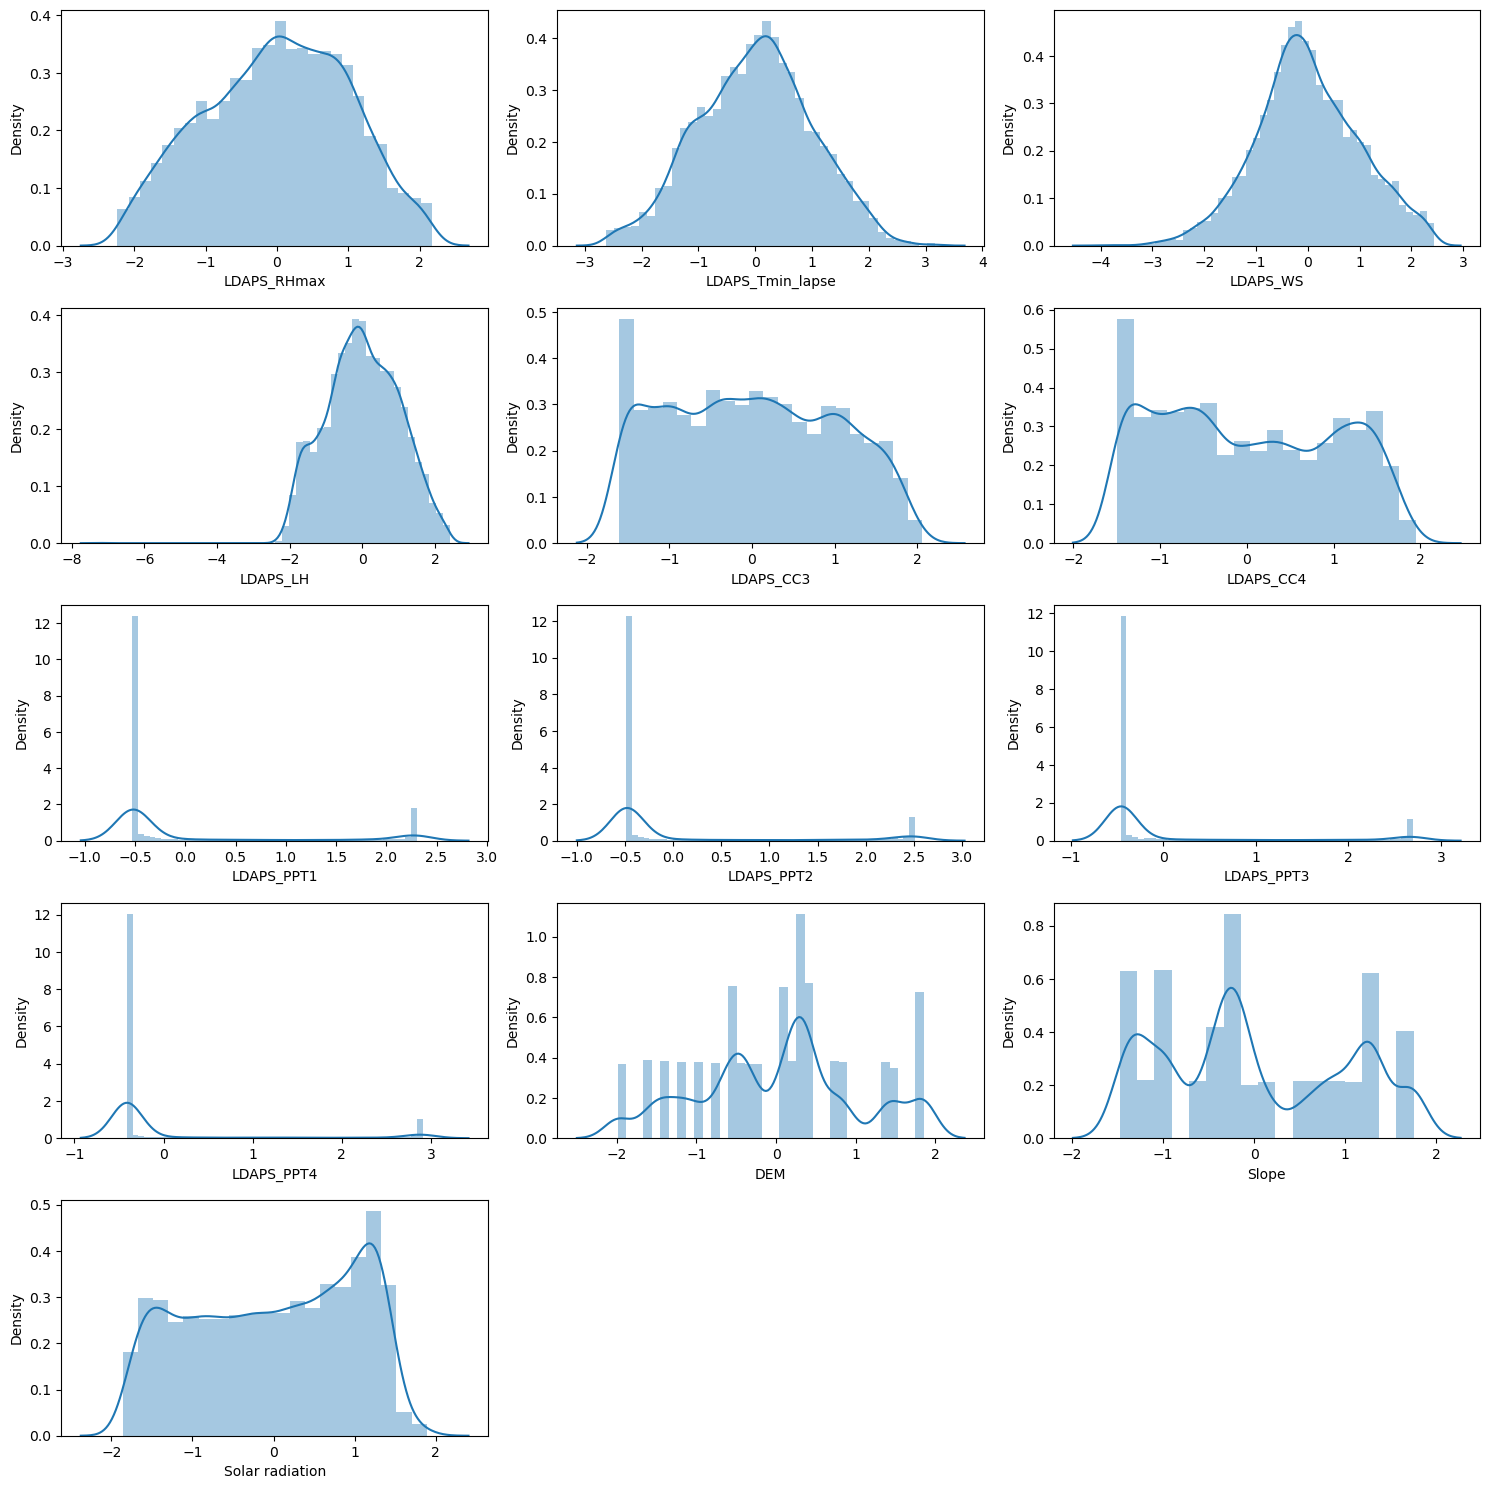

In [111]:
# Let's check how the data has been distirbuted in numerical columns after remove skewness
plt.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for col in skew:
    if plotnumber<=13:
        plt.subplot(5,3,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col)
    plotnumber+=1
plt.tight_layout()

This looks almsot normal and skewness is also removed.

## Correlation

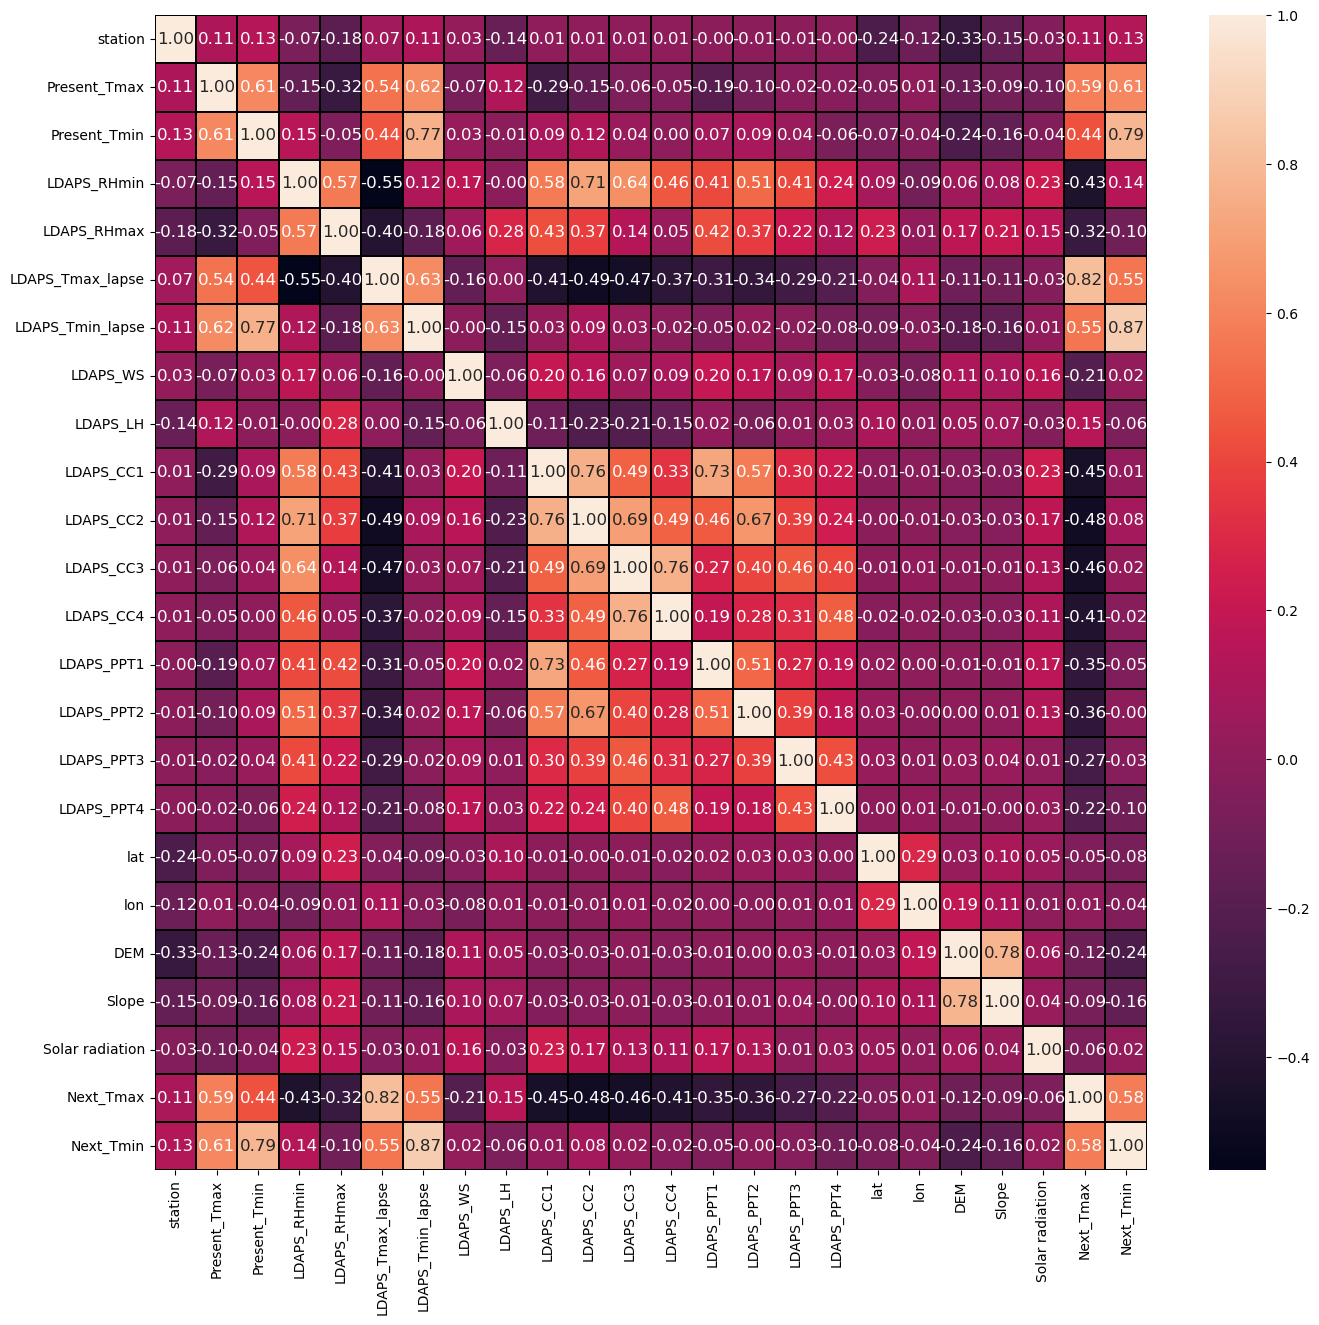

In [112]:
# Checking the correlation between features vs features and feature vs target
df_corr = df.corr()

# Visualizing the correlation using heatmap
plt.figure(figsize=(16,15))
sns.heatmap(df_corr, annot=True, annot_kws={'size':12},linewidths=0.1,linecolor='black',fmt='0.2f')
plt.show()

This heamap contains both positive and negative correlation. 
 1. The column Present_Tmax,LDAPS_Tmin_lapse as positive correlation with Next_Tmax target columns
 2. The column LDAPS_Tmax_lapse as positive correlation with Present_Tmintarget columns.
 3. The column LDAPS_Tmax_lapse as positive correlation with LDAPS_RHmin columns.
 4. The column LDAPS_CC2 as positive correlation with LDAPS_RHmin columns.

### Correlation of features with Target Variable Next_Tmax

In [113]:
# Correlation of features with Target Variable Next_Tmax
df_corr['Next_Tmax'].drop('Next_Tmax').sort_values(ascending=False)

LDAPS_Tmax_lapse    0.817272
Present_Tmax        0.587642
Next_Tmin           0.580732
LDAPS_Tmin_lapse    0.552320
Present_Tmin        0.441092
LDAPS_LH            0.149018
station             0.107200
lon                 0.009492
lat                -0.049571
Solar radiation    -0.057670
Slope              -0.085338
DEM                -0.118899
LDAPS_WS           -0.207418
LDAPS_PPT4         -0.217798
LDAPS_PPT3         -0.267871
LDAPS_RHmax        -0.320757
LDAPS_PPT1         -0.346537
LDAPS_PPT2         -0.355555
LDAPS_CC4          -0.414508
LDAPS_RHmin        -0.430792
LDAPS_CC1          -0.452016
LDAPS_CC3          -0.463242
LDAPS_CC2          -0.481804
Name: Next_Tmax, dtype: float64

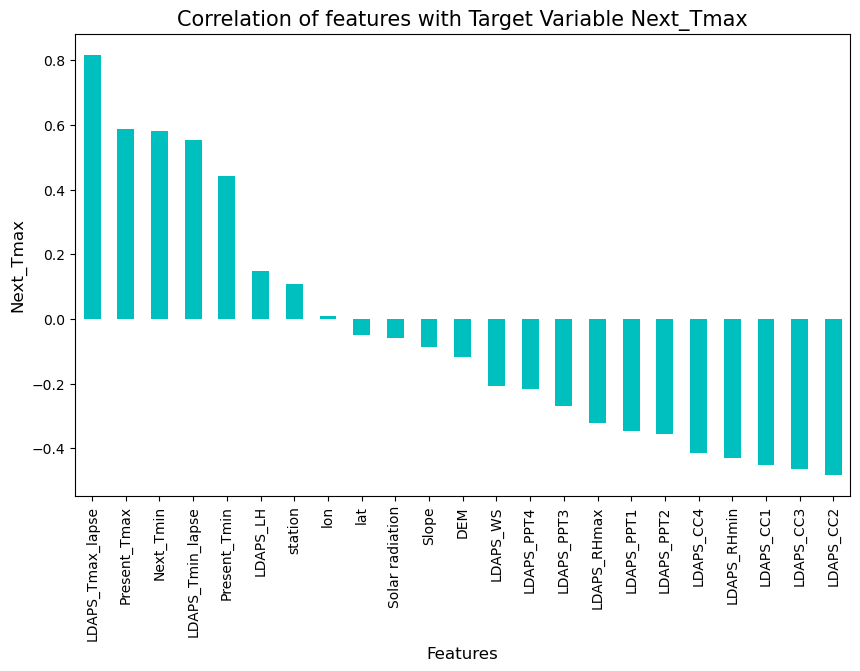

In [114]:
# visualizing correlation of feature vs target using barplot
plt.figure(figsize = (10,6))
df.corr()['Next_Tmax'].drop(['Next_Tmax']).sort_values(ascending=False).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=12)
plt.ylabel('Next_Tmax',fontsize=12)
plt.title('Correlation of features with Target Variable Next_Tmax',fontsize = 15)
plt.show()

* The features lon, lat has  poorly correlated with Next_Tmax target variable.
* LDAPS_Tmax_lapse maximum positive  correlated features with Next_Tmax target variable.
* LDAPS_CC2  maximum negative  correlated features with Next_Tmax target variable.

### Correlation of features with Target Variable Next_Tmin

In [115]:
# Correlation of features with Target Variable Next_Tmin
df_corr['Next_Tmin'].drop('Next_Tmin').sort_values(ascending=False)

LDAPS_Tmin_lapse    0.873907
Present_Tmin        0.786735
Present_Tmax        0.614959
Next_Tmax           0.580732
LDAPS_Tmax_lapse    0.552965
LDAPS_RHmin         0.140048
station             0.128705
LDAPS_CC2           0.083885
LDAPS_CC3           0.024633
LDAPS_WS            0.019727
Solar radiation     0.019103
LDAPS_CC1           0.012337
LDAPS_PPT2         -0.003371
LDAPS_CC4          -0.022696
LDAPS_PPT3         -0.027900
lon                -0.044614
LDAPS_PPT1         -0.051027
LDAPS_LH           -0.058401
lat                -0.077321
LDAPS_PPT4         -0.098265
LDAPS_RHmax        -0.102768
Slope              -0.159818
DEM                -0.240561
Name: Next_Tmin, dtype: float64

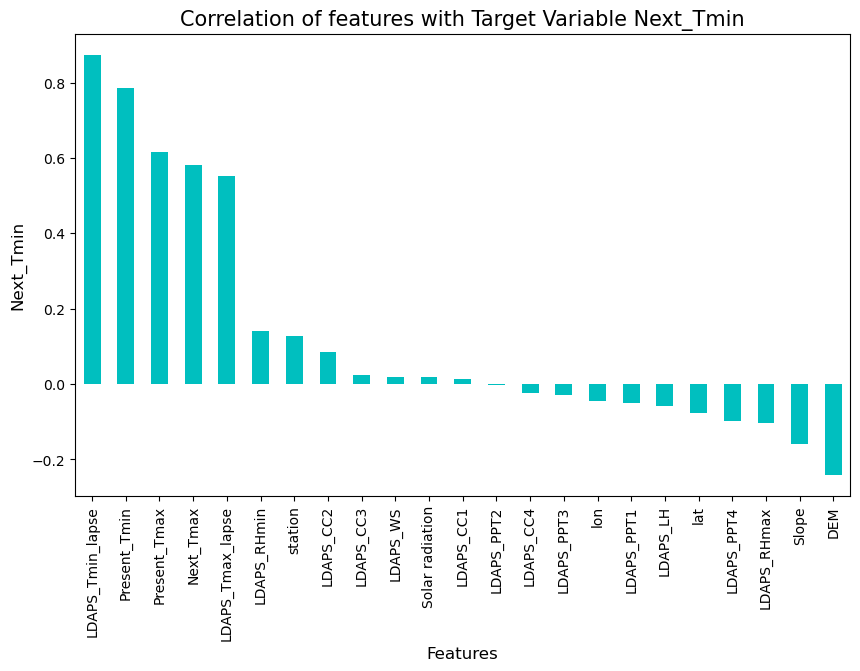

In [116]:
# visualizing correlation of feature vs target using barplot
plt.figure(figsize = (10,6))
df.corr()['Next_Tmin'].drop(['Next_Tmin']).sort_values(ascending=False).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=12)
plt.ylabel('Next_Tmin',fontsize=12)
plt.title('Correlation of features with Target Variable Next_Tmin',fontsize = 15)
plt.show()

* The features LDAPS_CC3, LDAPS_WS, Solar radiation, LDAPS_CC1, LDAPS_PPT2, LDAPS_CC4,LDAPS_PPT3 has poorly correlated with Next_Tmax target variable.
* LDAPS_Tmax_lapse maximum positive  correlated features with Next_Tmax target variable.
* DEM  maximum negative  correlated features with Next_Tmax target variable.

# Next_Tmax target

### Sparating features and  Next_Tmax target

In [117]:
x = df.drop(columns=['Next_Tmax','Next_Tmin'],axis=1)
y = df['Next_Tmax']

print('Shape of X',x.shape)
print('Shape of y ',y.shape)

Shape of X (6752, 22)
Shape of y  (6752,)


### Feature Scaling using Standard Scalarization

In [118]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

x.shape

(6752, 22)

We have scaled the data using Standard Scalrization method to overcome the issue of biasness.

### Checking Variance Inflation Factor (VIF)

In [119]:
# Find variance inflation factor of each column i.e. x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

vif

Feature  VIF values
0            station    1.289492
1       Present_Tmax    2.739466
2       Present_Tmin    3.092242
3        LDAPS_RHmin    5.864342
4        LDAPS_RHmax    2.522486
5   LDAPS_Tmax_lapse    6.369522
6   LDAPS_Tmin_lapse    6.624015
7           LDAPS_WS    1.187927
8           LDAPS_LH    1.494979
9          LDAPS_CC1    4.854167
10         LDAPS_CC2    5.443691
11         LDAPS_CC3    4.514236
12         LDAPS_CC4    2.773460
13        LDAPS_PPT1    2.588546
14        LDAPS_PPT2    2.118621
15        LDAPS_PPT3    1.582557
16        LDAPS_PPT4    1.590020
17               lat    1.289268
18               lon    1.223370
19               DEM    3.248374
20             Slope    2.841824
21   Solar radiation    1.227614

There is no multicollinearity issue, We can now move ahead for model building.

## Modelling

In [120]:
# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Model selection
from sklearn.model_selection import train_test_split, cross_val_score

### Finding Best Random state

In [121]:
# Find the best ranom state 

maxAcc = 0
maxRS  = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    y_pred = LR.predict(x_test)
    acc = r2_score(y_test,y_pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
        
print('The  Best accuracy score is',maxAcc,' on best random state is',maxRS)

The  Best accuracy score is 0.7806692135169128  on best random state is 169


### Creating train test split

In [122]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=maxRS)
print('The shape of x_train ',x_train.shape)
print('The shape of y_train ',y_train.shape)
print('The shape of x_test  ',x_test.shape)
print('The shape of y_test  ',y_test.shape)

The shape of x_train  (5064, 22)
The shape of y_train  (5064,)
The shape of x_test   (1688, 22)
The shape of y_test   (1688,)


In [123]:
LR  = LinearRegression()
L1 = Lasso()
L2 = Ridge(alpha=0.01)
KNN = KNeighborsRegressor()
DT  = DecisionTreeRegressor()
ET  = ExtraTreeRegressor()
RFR = RandomForestRegressor(n_estimators = 70 ,max_depth=25)
BC  = BaggingRegressor()
ABR = AdaBoostRegressor(learning_rate=0.1)
GBR = GradientBoostingRegressor(max_depth=25,learning_rate=0.1)
SVM = SVR()
XGB = XGBRegressor()

models = {'LinearRegression':LR,'KNeighbors':KNN,'DecisionTree':DT,'ExtraTree':ET,'RandomForest':RFR,
         'Bagging':BC,'AdaBoost':ABR,'GradientBoosting':GBR,'SVR':SVM,'XGBoost':XGB,'Lasso':L1,'Ridge':L2}

### Applying all the models 

In [124]:
for name,model in models.items():
    model.fit(x_train,y_train)
    model.score(x_train,y_train)
    y_pred = model.predict(x_test)
    print('\033[1m'+'Error of',name,'\033[0m')
    print('Mean absolute error      :',mean_absolute_error(y_test,y_pred))
    print('Mean squared error       :',mean_squared_error(y_test,y_pred))
    print('Root mean squared error  :',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('\n')
    print('\033[1m'+'R2 Score '+'\033[0m')
    print(r2_score(y_test,y_pred))
    print('*************************************************************************\n')

Error of LinearRegression 
Mean absolute error      : 1.0540604678670384
Mean squared error       : 1.9148394397244908
Root mean squared error  : 1.3837772363081027


R2 Score 
0.7806692135169128
*************************************************************************

Error of KNeighbors 
Mean absolute error      : 0.9046800947867298
Mean squared error       : 1.4021063981042652
Root mean squared error  : 1.1841057377211992


R2 Score 
0.839399015578338
*************************************************************************

Error of DecisionTree 
Mean absolute error      : 1.0897511848341233
Mean squared error       : 2.257920616113744
Root mean squared error  : 1.5026378858905907


R2 Score 
0.741371785918584
*************************************************************************

Error of ExtraTree 
Mean absolute error      : 1.0421208530805686
Mean squared error       : 2.107434834123223
Root mean squared error  : 1.4517006696021129


R2 Score 
0.7586088263898478
************

# Cross Validation

In [125]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy_score = r2_score(y_test,y_pred)
    score = cross_val_score(model,x,y,cv = 5)
    print('\033[1m',name,'\033[0m\n')
    print('R2 Score                       :',accuracy_score)
    print('Cross Validation Score         :',score)
    print('Mean of Cross Validation Score :',score.mean())
    
    final = accuracy_score - score.mean()
    print('\nDifferent between R2 Score vs Cross Validaton Score :',final)
    print('********************************************************************************\n')

 LinearRegression 

R2 Score                       : 0.7806692135169128
Cross Validation Score         : [0.72201007 0.66660678 0.68034649 0.73083526 0.64711592]
Mean of Cross Validation Score : 0.6893829038665407

Different between R2 Score vs Cross Validaton Score : 0.0912863096503721
********************************************************************************

 KNeighbors 

R2 Score                       : 0.839399015578338
Cross Validation Score         : [0.62234168 0.42067392 0.50703793 0.59613393 0.55553897]
Mean of Cross Validation Score : 0.5403452862562966

Different between R2 Score vs Cross Validaton Score : 0.29905372932204133
********************************************************************************

 DecisionTree 

R2 Score                       : 0.7381078632090816
Cross Validation Score         : [0.40566675 0.33848726 0.35903018 0.50972301 0.36513413]
Mean of Cross Validation Score : 0.39560826563694185

Different between R2 Score vs Cross Validaton Score : 

### Support Vector Regressor is out best model.

**We can see that Support Vector Regressor gives less error between accuracy score and CrossValidation.**

R2 Score                       : 0.8612767645685596
Cross Validation Score         : [0.65296374 0.54805547 0.66381566 0.71241901 0.63009405]
Mean of Cross Validation Score : 0.6414695865421474

Different between R2 Score vs Cross Validaton Score : 0.21980717802641225

### Hyper paramter tuning : GridSearchCV

#### Tune the parameter with Support Vector Regressor model

In [126]:
SVM.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [127]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C' : [1,5,10,20],
              'gamma': [0.001,0.01,0.02,0.002],
             }

GCV = GridSearchCV(estimator = SVM, param_grid=param_grid, n_jobs = -1, verbose=5)

GCV.fit(x_train,y_train)

print('Best estimator : ',GCV.best_estimator_)
print('\n')
print('Best score : ',GCV.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best estimator :  SVR(C=20, gamma=0.02)


Best score :  0.8824340336663916


### Final Model

In [128]:
Final_mod = GCV.best_estimator_
Final_mod.fit(x_train,y_train)
y_pred=Final_mod.predict(x_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.6901986396603363
Mean squared error : 0.9089326075485343
Root Mean Squared Error: 0.9533795716022734


 R2 Score of Final Model :
0.8958884491629089




 Actual Values Vs Predicted Value plot :


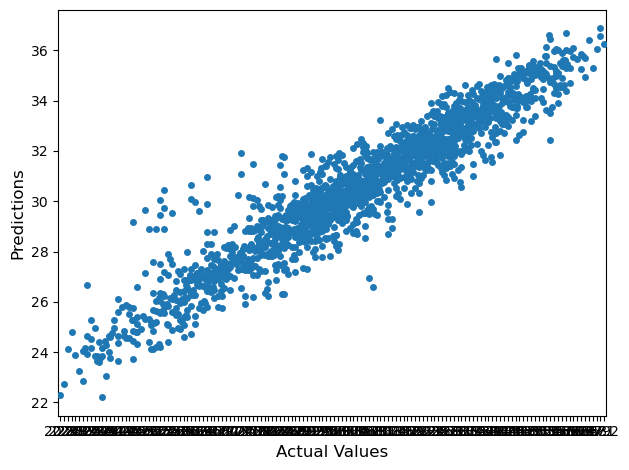

In [129]:
y_pred=Final_mod.predict(x_test)
sns.swarmplot(x = y_test.round(2),y = y_pred)
print('\033[1m'+' Actual Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('Actual Values' , fontsize=12)
plt.ylabel('Predictions', fontsize=12)
plt.tight_layout()

### Saving Model

In [130]:
import pickle
filename = 'Next_Tmax_Temperature.pkl'
pickle.dump(Final_mod, open(filename, 'wb'))  # Saved model

### Predicting the saved model

In [131]:
import pickle
loaded_model = pickle.load(open('Next_Tmax_Temperature.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

89.5888449162909


In [132]:
conculsion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conculsion

0          1          2          3          4          5     \
Predicted  28.94788  30.615706  31.031488  26.862831  28.369803  34.107207   
Original   29.60000  30.500000  31.200000  28.400000  29.200000  34.300000   

                6          7          8          9          10         11    \
Predicted  35.895057  27.761436  29.112184  29.564986  30.162139  28.802863   
Original   35.800000  27.300000  30.400000  29.000000  30.000000  30.200000   

                12         13         14         15         16         17    \
Predicted  32.458255  28.482049  29.376045  29.812457  29.978286  35.183603   
Original   32.800000  27.900000  29.000000  27.800000  31.100000  35.000000   

                18        19         20         21         22         23    \
Predicted  29.561388  34.90354  29.848476  24.974975  33.918517  29.348991   
Original   30.200000  35.80000  29.900000  24.200000  33.100000  29.700000   

                24         25       26         27         28        29    \
Predicted  28.759944  32.763175  33.5199  31.995263  34.549458  33.68468   
Original   28.600000  34.000000  33.0000  31.800000  34.200000  33.30000   

               30         31         32         33         34         35    \
Predicted  26.95672  30.427763  29.422139  30.621397  28.934519  27.321656   
Original   27.30000  30.300000  30.000000  30.600000  28.200000  27.100000   

                36         37         38        39         40        41    \
Predicted  28.598407  26.630778  27.692075  27.11732  32.965979  33.17192   
Original   29.200000  26.600000  27.400000  25.90000  32.700000  33.00000   

                42         43         44         45         46        47    \
Predicted  28.611192  35.441762  27.727754  31.396677  32.041546  30.81589   
Original   29.000000  35.900000  27.300000  32.000000  31.800000  31.80000   

                48         49         50         51         52         53    \
Predicted  33.261524  35.045322  33.388102  28.263958  30.718019  24.794683   
Original   33.800000  34.600000  35.100000  28.700000  30.400000  24.800000   

                54         55         56         57         58         59    \
Predicted  30.790251  29.271285  29.729608  32.201073  32.020092  28.903472   
Original   30.900000  28.800000  30.000000  31.700000  32.100000  25.500000   

                60         61        62         63         64         65    \
Predicted  28.454463  34.416544  31.63387  30.243578  32.009142  27.382865   
Original   28.600000  33.500000  32.50000  29.700000  33.700000  27.200000   

                66         67         68         69         70         71    \
Predicted  31.676584  27.904597  34.980456  30.454991  27.247147  33.592288   
Original   30.600000  26.700000  35.600000  29.400000  27.000000  33.500000   

                72         73         74         75         76         77    \
Predicted  32.108888  28.100587  28.245149  27.251792  24.155504  29.981407   
Original   30.400000  27.500000  27.200000  26.900000  23.900000  32.400000   

                78         79        80         81         82         83    \
Predicted  34.090833  31.708243  31.94238  31.166726  29.637934  29.127741   
Original   34.700000  31.400000  32.00000  31.900000  30.800000  30.100000   

                84         85         86         87         88         89    \
Predicted  32.505204  30.094372  22.304909  33.667203  22.739743  29.998841   
Original   32.200000  29.100000  20.800000  33.800000  22.400000  30.300000   

                90         91         92         93         94         95    \
Predicted  30.318915  32.039862  30.096834  28.709342  30.957916  27.667826   
Original   31.600000  32.400000  26.200000  29.400000  30.100000  27.700000   

                96         97         98         99        100        101   \
Predicted  29.790269  33.814892  33.177826  33.469071  31.28438  32.865573   
Original   30.400000  34.000000  35.000000  33.300000  31.20000  33.000000   

     

# Next_Tmin target

### Sparating features and  Next_Tmin target

In [133]:
x = df.drop(columns=['Next_Tmax','Next_Tmin'],axis=1)
y = df['Next_Tmin']

print('Shape of X',x.shape)
print('Shape of y ',y.shape)

Shape of X (6752, 22)
Shape of y  (6752,)


### Feature Scaling using Standard Scalarization

In [134]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

x.shape

(6752, 22)

We have scaled the data using Standard Scalrization method to overcome the issue of biasness.

### Checking Variance Inflation Factor (VIF)

In [135]:
# Find variance inflation factor of each column i.e. x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

vif

Feature  VIF values
0            station    1.289492
1       Present_Tmax    2.739466
2       Present_Tmin    3.092242
3        LDAPS_RHmin    5.864342
4        LDAPS_RHmax    2.522486
5   LDAPS_Tmax_lapse    6.369522
6   LDAPS_Tmin_lapse    6.624015
7           LDAPS_WS    1.187927
8           LDAPS_LH    1.494979
9          LDAPS_CC1    4.854167
10         LDAPS_CC2    5.443691
11         LDAPS_CC3    4.514236
12         LDAPS_CC4    2.773460
13        LDAPS_PPT1    2.588546
14        LDAPS_PPT2    2.118621
15        LDAPS_PPT3    1.582557
16        LDAPS_PPT4    1.590020
17               lat    1.289268
18               lon    1.223370
19               DEM    3.248374
20             Slope    2.841824
21   Solar radiation    1.227614

There is no multicollinearity issue, We can now move ahead for model building.

## Modelling

In [136]:
# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Model selection
from sklearn.model_selection import train_test_split, cross_val_score

### Finding Best Random state

In [137]:
# Find the best ranom state 
maxAcc = 0
maxRS  = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    y_pred = LR.predict(x_test)
    acc = r2_score(y_test,y_pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
        
print('The  Best accuracy score is',maxAcc,' on best random state is',maxRS)

The  Best accuracy score is 0.8404205591917012  on best random state is 134


### Creating train test split

In [140]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=maxRS)
print('The shape of x_train ',x_train.shape)
print('The shape of y_train ',y_train.shape)
print('The shape of x_test  ',x_test.shape)
print('The shape of y_test  ',y_test.shape)

The shape of x_train  (5064, 22)
The shape of y_train  (5064,)
The shape of x_test   (1688, 22)
The shape of y_test   (1688,)


### Applying all Regression Model

In [141]:
LR  = LinearRegression()
L1 = Lasso()
L2 = Ridge(alpha=0.01)
KNN = KNeighborsRegressor()
DT  = DecisionTreeRegressor()
ET  = ExtraTreeRegressor()
RFR = RandomForestRegressor(n_estimators = 70 ,max_depth=25)
BC  = BaggingRegressor()
ABR = AdaBoostRegressor(learning_rate=0.1)
GBR = GradientBoostingRegressor(max_depth=25,learning_rate=0.1)
SVM = SVR()
XGB = XGBRegressor()

models = {'LinearRegression':LR,'KNeighbors':KNN,'DecisionTree':DT,'ExtraTree':ET,'RandomForest':RFR,
         'Bagging':BC,'AdaBoost':ABR,'GradientBoosting':GBR,'SVR':SVM,'XGBoost':XGB,'Lasso':L1,'Ridge':L2}

### Applying all the models 

In [142]:
for name,model in models.items():
    model.fit(x_train,y_train)
    model.score(x_train,y_train)
    y_pred = model.predict(x_test)
    print('\033[1m'+'Error of',name,'\033[0m')
    print('Mean absolute error      :',mean_absolute_error(y_test,y_pred))
    print('Mean squared error       :',mean_squared_error(y_test,y_pred))
    print('Root mean squared error  :',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('\n')
    print('\033[1m'+'R2 Score '+'\033[0m')
    print(r2_score(y_test,y_pred))
    print('*************************************************************************\n')

Error of LinearRegression 
Mean absolute error      : 0.7853193351250363
Mean squared error       : 0.9752503417162177
Root mean squared error  : 0.98754764022614


R2 Score 
0.8404205591917012
*************************************************************************

Error of KNeighbors 
Mean absolute error      : 0.7124881516587678
Mean squared error       : 0.8633421800947867
Root mean squared error  : 0.9291620849425501


R2 Score 
0.8587320030226321
*************************************************************************

Error of DecisionTree 
Mean absolute error      : 0.8989928909952607
Mean squared error       : 1.4753376777251184
Root mean squared error  : 1.2146347919128277


R2 Score 
0.7585916645766263
*************************************************************************

Error of ExtraTree 
Mean absolute error      : 0.9284360189573458
Mean squared error       : 1.5198222748815167
Root mean squared error  : 1.2328107214335526


R2 Score 
0.7513126851852341
**********

# Cross Validation

In [143]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy_score = r2_score(y_test,y_pred)
    score = cross_val_score(model,x,y,cv = 5)
    print('\033[1m',name,'\033[0m\n')
    print('R2 Score                       :',accuracy_score)
    print('Cross Validation Score         :',score)
    print('Mean of Cross Validation Score :',score.mean())
    
    final = accuracy_score - score.mean()
    print('\nDifferent between R2 Score vs Cross Validaton Score :',final)
    print('********************************************************************************\n')

 LinearRegression 

R2 Score                       : 0.8404205591917012
Cross Validation Score         : [0.72585274 0.66564079 0.78679284 0.84767    0.83681274]
Mean of Cross Validation Score : 0.7725538215241772

Different between R2 Score vs Cross Validaton Score : 0.06786673766752405
********************************************************************************

 KNeighbors 

R2 Score                       : 0.8587320030226321
Cross Validation Score         : [0.51878913 0.43324186 0.65561499 0.68932332 0.76105599]
Mean of Cross Validation Score : 0.6116050579457223

Different between R2 Score vs Cross Validaton Score : 0.2471269450769098
********************************************************************************

 DecisionTree 

R2 Score                       : 0.7582058563734335
Cross Validation Score         : [0.42477332 0.4623538  0.57403875 0.7256565  0.68343226]
Mean of Cross Validation Score : 0.5740509259567548

Different between R2 Score vs Cross Validaton Score : 

### LassoRegression is out best model.

**We can see that LassoRegression gives less error between accuracy score and CrossValidation.**

R2 Score                       : 0.5866514028636144
Cross Validation Score         : [0.57131336 0.42306466 0.56877173 0.51242077 0.61491616]
Mean of Cross Validation Score : 0.5380973367251478

Different between R2 Score vs Cross Validaton Score : 0.04855406613846658

### Hyper paramter tuning : GridSearchCV

#### Tune the parameter with LassoRegression model

In [145]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha':np.array([1,0.5,0.1,0.01]),
              'fit_intercept': [True,False],
              'max_iter':[250,500],
              'random_state':np.arange(1,100,10),
              'selection':["cyclic","random"]}

GCV = GridSearchCV(estimator = L1, param_grid=param_grid, n_jobs = -1, verbose=5)

GCV.fit(x_train,y_train)

print('Best estimator : ',GCV.best_estimator_)
print('\n')
print('Best score : ',GCV.best_score_)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Best estimator :  Lasso(alpha=0.01, max_iter=250, random_state=91, selection='random')


Best score :  0.8111409990615431


### Final Model

In [149]:
Final_mod = GCV.best_estimator_
Final_mod.fit(x_train,y_train)
y_pred=Final_mod.predict(x_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.7864059003787727
Mean squared error : 0.9785208710742698
Root Mean Squared Error: 0.9892021386320744


 R2 Score of Final Model :
0.8398854050638015




 Actual Values Vs Predicted Value plot :


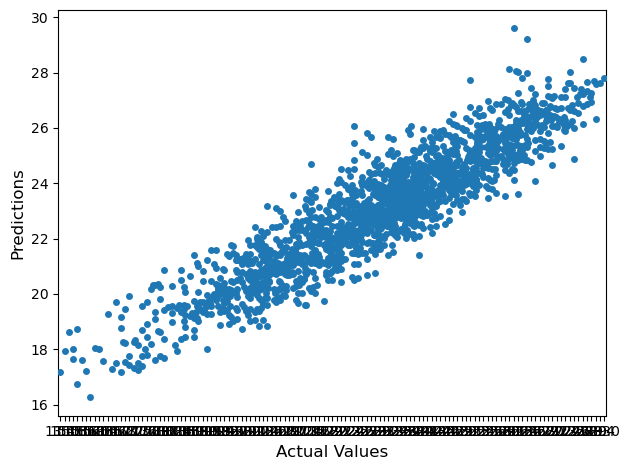

In [150]:
y_pred=Final_mod.predict(x_test)
sns.swarmplot(x = y_test.round(2),y = y_pred)
print('\033[1m'+' Actual Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('Actual Values' , fontsize=12)
plt.ylabel('Predictions', fontsize=12)
plt.tight_layout()

Here we have plotted the ROC curve for the final model and the AUC value for the best model is 100%

### Saving Model

In [151]:
import pickle
filename = 'Next_Tmin_Temperature.pkl'
pickle.dump(Final_mod, open(filename, 'wb'))  # Saved model

### Predicting the saved model

In [152]:
import pickle
loaded_model = pickle.load(open('Next_Tmin_Temperature.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

83.98854050638015


In [153]:
conculsion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conculsion

0          1          2          3         4          5     \
Predicted  23.618591  22.565223  17.941013  21.605543  20.18167  26.162574   
Original   23.400000  23.400000  18.400000  19.200000  19.50000  26.300000   

                6         7         8          9          10         11    \
Predicted  25.187733  23.57971  23.96348  23.250088  23.814656  21.768058   
Original   24.800000  23.90000  23.40000  23.800000  24.100000  21.300000   

                12         13        14         15        16         17    \
Predicted  20.437675  23.111619  23.38509  19.832595  21.27918  20.780531   
Original   19.900000  20.700000  22.30000  18.000000  21.00000  20.700000   

                18         19         20         21         22         23    \
Predicted  19.628241  24.094085  24.139603  24.364115  23.994764  22.352241   
Original   19.900000  26.700000  24.900000  24.900000  25.100000  22.600000   

                24         25         26         27       28         29    \
Predicted  17.623598  21.322379  23.813647  19.932275  24.2206  25.206748   
Original   15.600000  21.500000  22.400000  17.200000  23.9000  26.300000   

                30         31         32         33         34         35    \
Predicted  22.583265  17.519821  26.423849  20.690463  23.517331  19.043705   
Original   23.900000  17.500000  27.000000  21.900000  22.000000  20.200000   

                36         37         38         39         40         41    \
Predicted  22.449328  24.453295  19.419045  22.947623  25.521498  25.659871   
Original   21.500000  24.200000  18.100000  23.600000  26.900000  26.000000   

                42         43         44        45        46         47    \
Predicted  24.756242  23.710499  22.793147  23.53972  22.10337  24.499042   
Original   24.900000  24.500000  22.400000  24.00000  21.70000  23.800000   

                48         49         50         51         52         53    \
Predicted  21.426233  22.737505  20.721629  20.244614  24.009871  18.867608   
Original   22.000000  23.000000  20.000000  20.900000  23.800000  19.400000   

                54         55         56         57         58         59    \
Predicted  23.531629  20.169545  19.771243  20.679922  23.011977  25.875537   
Original   25.300000  20.300000  19.100000  20.300000  23.500000  27.400000   

                60         61         62        63         64         65    \
Predicted  22.883227  24.456461  23.191032  19.23683  23.955375  26.079593   
Original   22.400000  23.500000  22.700000  20.10000  24.600000  27.200000   

                66         67         68         69         70        71    \
Predicted  22.913846  24.702113  19.347399  23.567817  23.927996  25.76494   
Original   23.200000  25.100000  19.000000  24.600000  24.900000  23.80000   

                72         73         74         75         76         77    \
Predicted  27.529051  22.507812  21.683995  25.307368  20.308667  23.175109   
Original   27.000000  22.800000  22.000000  25.600000  20.800000  22.700000   

                78         79         80         81        82        83    \
Predicted  19.843611  20.540562  23.945134  21.252893  21.09514  20.24871   
Original   19.200000  20.200000  24.600000  20.000000  19.90000  21.60000   

                84         85         86         87        88         89    \
Predicted  23.734847  24.069031  24.071831  21.203198  22.88497  25.201854   
Original   23.800000  24.800000  23.600000  20.500000  22.70000  23.900000   

                90         91         92         93         94         95    \
Predicted  24.339962  22.464797  20.207942  23.954249  25.277469  27.133269   
Original   24.700000  23.900000  21.100000  24.100000  24.800000  27.400000   

                96         97        98         99         100        101   \
Predicted  24.338035  23.807772  24.51494  27.597516  24.134495  20.588797   
Original   22.900000  25.700000  24.40000  28.300000  23.900000  20.100000   

               